# Inputs

In [1]:
import os
import pandas as pd
import yaml
import torch
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)
print(torch.cuda.get_device_name())
print(torch.__version__)
print(torch.version.cuda)
x = torch.randn(1).cuda()
print(x)

cuda
NVIDIA GeForce RTX 3090 Ti
2.5.1+cu124
12.4
tensor([0.4729], device='cuda:0')


In [3]:
CONFIG_PATH = "configs/uc_infeksi_chron_tb"

In [4]:
DATASET_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "dataset.yaml")), Loader=yaml.SafeLoader)
PREPROCESSING_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "preprocessing.yaml")), Loader=yaml.SafeLoader)
MODEL_NAME = yaml.load(open(os.path.join(CONFIG_PATH, "model.yaml")), Loader=yaml.SafeLoader)['MODEL_NAME']
MODEL_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "model.yaml")), Loader=yaml.SafeLoader)[MODEL_NAME]
TRAINING_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "training.yaml")), Loader=yaml.SafeLoader)

In [5]:
categories =  DATASET_PARAMS['CATEGORIES']

BASE_DIR = os.getcwd()
DATASET_DIR = os.path.join(BASE_DIR, DATASET_PARAMS['DATA_PATH'])

TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")
TEST_DIR = os.path.join(DATASET_DIR, "test")
categories

['uc', 'infeksi', 'chron', 'tb']

In [6]:
from src.utils import get_device, set_seed

set_seed(DATASET_PARAMS['SEED'])
DEVICE = get_device()
print(f"Using device: {DEVICE}")

Using device: cuda


# Dataset

The dataset structure must be like this:

XDL_Collitis/
├── datasets/
│   ├── uc/
│   │   ├── limuc/
│   │   │   ├── uc_1/
│   │   │   ├── uc_2/
│   │   │   └── uc_3/
│   │   ├── changsu/
│   │   │   ├── uc_1/
│   │   │   ├── uc_2/
│   │   │   └── uc_3/
│   │   └── hyperkvasir/
│   │       ├── uc_1/
│   │       ├── uc_2/
│   │       └── uc_3/
│   └── infeksi/
│       └── infeksi_non_spesifik/

In [7]:
from src.utils import split_dataset

In [8]:
# Jadi di file ini, belum pake implementasi lu ya Vii

# train_filenames_df, val_filenames_df, test_filenames_df = split_dataset(DATASET_DIR, 
#                                                                         categories, 
#                                                                         DATASET_PARAMS['UC_SOURCE'], 
#                                                                         shuffle=DATASET_PARAMS['IS_SHUFFLE'], 
#                                                                         seed=DATASET_PARAMS['SEED'], 
#                                                                         split_ratio=DATASET_PARAMS['SPLIT_RATIO'])

In [9]:
uc_filenames = {"image_path": [], "class": [], "source": []}

uc_directory = os.path.join(DATASET_DIR, "uc")

uc_subdirectories = os.listdir(uc_directory)

for subdirectory in uc_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(uc_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                uc_filenames["image_path"].append(image_path)
                uc_filenames["class"].append("uc")
                uc_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

uc_filenames_df = pd.DataFrame(uc_filenames)
uc_filenames_df

subdirectory: changsu_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test
subdirectory: limuc_cropped_2


,image_path,class,source
0,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,changsu_cropped
1,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,changsu_cropped
2,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,changsu_cropped
3,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,changsu_cropped
4,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,changsu_cropped
...,...,...,...
2945,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,limuc_cropped_2
2946,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,limuc_cropped_2
2947,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,limuc_cropped_2
2948,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,uc,limuc_cropped_2


In [10]:
infeksi_filenames = {"image_path": [], "class": [], "source": []}

infeksi_directory = os.path.join(DATASET_DIR, "infeksi")

infeksi_subdirectories = os.listdir(infeksi_directory)

for subdirectory in infeksi_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(infeksi_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                infeksi_filenames["image_path"].append(image_path)
                infeksi_filenames["class"].append("infeksi")
                infeksi_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

infeksi_filenames_df = pd.DataFrame(infeksi_filenames)
infeksi_filenames_df

subdirectory: indo_cropped


,image_path,class,source
0,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
1,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
2,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
3,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
4,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
...,...,...,...
1297,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
1298,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
1299,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped
1300,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,infeksi,indo_cropped


In [11]:
chron_filenames = {"image_path": [], "class": [], "source": []}

chron_directory = os.path.join(DATASET_DIR, "chron")

chron_subdirectories = os.listdir(chron_directory)

for subdirectory in chron_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(chron_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                chron_filenames["image_path"].append(image_path)
                chron_filenames["class"].append("chron")
                chron_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

chron_filenames_df = pd.DataFrame(chron_filenames)
chron_filenames_df

subdirectory: asan_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test


,image_path,class,source
0,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,asan_cropped
1,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,asan_cropped
2,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,asan_cropped
3,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,asan_cropped
4,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,asan_cropped
...,...,...,...
2101,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,indo_cropped_test
2102,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,indo_cropped_test
2103,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,indo_cropped_test
2104,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,chron,indo_cropped_test


In [12]:
tb_filenames = {"image_path": [], "class": [], "source": []}

tb_directory = os.path.join(DATASET_DIR, "tb")

tb_subdirectories = os.listdir(tb_directory)

for subdirectory in tb_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(tb_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                tb_filenames["image_path"].append(image_path)
                tb_filenames["class"].append("tb")
                tb_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

tb_filenames_df = pd.DataFrame(tb_filenames)
tb_filenames_df

subdirectory: asan_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test


,image_path,class,source
0,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,asan_cropped
1,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,asan_cropped
2,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,asan_cropped
3,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,asan_cropped
4,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,asan_cropped
...,...,...,...
1318,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,indo_cropped_test
1319,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,indo_cropped_test
1320,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,indo_cropped_test
1321,e:\13621060 Hafizh Renanto Akhmad\XDL_Collitis...,tb,indo_cropped_test


In [13]:
from sklearn.model_selection import train_test_split

# Splitting dilakukan per-kelas

# UC
uc_trainval_filenames_df, uc_test_filenames_df = train_test_split(uc_filenames_df,
                                                                  test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                  random_state=DATASET_PARAMS['SEED'],
                                                                  stratify=uc_filenames_df['source'])

uc_train_filenames_df, uc_val_filenames_df = train_test_split(uc_trainval_filenames_df,
                                                              test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                              random_state=DATASET_PARAMS['SEED'],
                                                              stratify=uc_trainval_filenames_df['source'])

# Infeksi
infeksi_trainval_filenames_df, infeksi_test_filenames_df = train_test_split(infeksi_filenames_df,
                                                                  test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                  random_state=DATASET_PARAMS['SEED'],
                                                                  stratify=infeksi_filenames_df['source'])

infeksi_train_filenames_df, infeksi_val_filenames_df = train_test_split(infeksi_trainval_filenames_df,
                                                              test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                              random_state=DATASET_PARAMS['SEED'],
                                                              stratify=infeksi_trainval_filenames_df['source'])

# Chron
chron_trainval_filenames_df, chron_test_filenames_df = train_test_split(chron_filenames_df,
                                                                        test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                        random_state=DATASET_PARAMS['SEED'],
                                                                        stratify=chron_filenames_df['source'])

chron_train_filenames_df, chron_val_filenames_df = train_test_split(chron_trainval_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=chron_trainval_filenames_df['source'])

# TB
tb_trainval_filenames_df, tb_test_filenames_df = train_test_split(tb_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=tb_filenames_df['source'])

tb_train_filenames_df, tb_val_filenames_df = train_test_split(tb_trainval_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1
                                                                    / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=tb_trainval_filenames_df['source'])

In [14]:
# Strategi cropped-dataset

# # For TB: take all indo_cropped and indo_cropped_test sourced files and complete the rest with asan sourced file until 1000 files
# tb_train_filenames_df_indo = tb_train_filenames_df[(tb_train_filenames_df['source'] == 'indo_cropped') | (tb_train_filenames_df['source'] == 'indo_cropped_test')]
# tb_train_filenames_df_asan = tb_train_filenames_df[tb_train_filenames_df.index.isin(tb_train_filenames_df_indo.index) == False]

# total_non_indo = 1000 - len(tb_train_filenames_df_indo)
# tb_train_filenames_df_asan = tb_train_filenames_df_asan.sample(n=total_non_indo, random_state=DATASET_PARAMS['SEED'])

# tb_train_filenames_df = pd.concat([tb_train_filenames_df_indo, tb_train_filenames_df_asan], ignore_index=True)

# # For Infeksi, sample 1000 files
# infeksi_train_filenames_df = infeksi_train_filenames_df.sample(n=1000, random_state=DATASET_PARAMS['SEED'], replace=False)

# # For UC, sample 500 from indo_cropped and indo_cropped_test and sample 250 from limuc_cropped_2 and changu_cropped
# uc_train_filenames_df_indo = uc_train_filenames_df[(uc_train_filenames_df['source'] == 'indo_cropped') | (uc_train_filenames_df['source'] == 'indo_cropped_test')]
# uc_train_filenames_df_limuc = uc_train_filenames_df[uc_train_filenames_df['source'] == 'limuc_cropped_2']
# uc_train_filenames_df_changsu = uc_train_filenames_df[uc_train_filenames_df['source'] == 'changsu_cropped']

# # Sample 500 from indo_cropped and indo_cropped_test
# uc_train_filenames_df_indo = uc_train_filenames_df_indo.sample(n=len(uc_train_filenames_df_indo), random_state=DATASET_PARAMS['SEED'], replace=False)

# # Sample each 250 from limuc_cropped_2 and changu_cropped
# total_non_indo = 1000 - len(uc_train_filenames_df_indo)
# total_each_non_indo = total_non_indo // 2

# uc_train_filenames_df_limuc = uc_train_filenames_df_limuc.sample(n=total_each_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)
# uc_train_filenames_df_changsu = uc_train_filenames_df_changsu.sample(n=total_each_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)

# uc_train_filenames_df = pd.concat([uc_train_filenames_df_indo, uc_train_filenames_df_limuc, uc_train_filenames_df_changsu], ignore_index=True)

# # For Chron, take all indo_cropped and indo_cropped_test sourced files and complete the rest with asan sourced file until 1000 files
# chron_train_filenames_df_indo = chron_train_filenames_df[(chron_train_filenames_df['source'] == 'indo_cropped') | (chron_train_filenames_df['source'] == 'indo_cropped_test')]
# chron_train_filenames_df_asan = chron_train_filenames_df[chron_train_filenames_df.index.isin(chron_train_filenames_df_indo.index) == False]

# # Sample 500 from indo_cropped and indo_cropped_test
# chron_train_filenames_df_indo = chron_train_filenames_df_indo.sample(n=len(chron_train_filenames_df_indo), random_state=DATASET_PARAMS['SEED'], replace=False)

# # Sample 500 from asan
# total_non_indo = 1000 - len(chron_train_filenames_df_indo)
# chron_train_filenames_df_asan = chron_train_filenames_df_asan.sample(n=total_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)

# chron_train_filenames_df = pd.concat([chron_train_filenames_df_indo, chron_train_filenames_df_asan], ignore_index=True)

In [15]:
# Atur kelas mana saja di sini

train_filenames_df = pd.concat([uc_train_filenames_df, infeksi_train_filenames_df, chron_train_filenames_df, tb_train_filenames_df], ignore_index=True)
val_filenames_df = pd.concat([uc_val_filenames_df, infeksi_val_filenames_df, chron_val_filenames_df, tb_val_filenames_df], ignore_index=True)
test_filenames_df = pd.concat([uc_test_filenames_df, infeksi_test_filenames_df, chron_test_filenames_df, tb_test_filenames_df], ignore_index=True)

# train_filenames_df = pd.concat([uc_train_filenames_df, infeksi_train_filenames_df], ignore_index=True)
# val_filenames_df = pd.concat([uc_val_filenames_df, infeksi_val_filenames_df], ignore_index=True)
# test_filenames_df = pd.concat([uc_test_filenames_df, infeksi_test_filenames_df], ignore_index=True)

# train_filenames_df = pd.concat([chron_train_filenames_df, tb_train_filenames_df], ignore_index=True)
# val_filenames_df = pd.concat([chron_val_filenames_df, tb_val_filenames_df], ignore_index=True)
# test_filenames_df = pd.concat([chron_test_filenames_df, tb_test_filenames_df], ignore_index=True)

In [16]:
# Nyalakan jika hanya ingin mengambil dataset Indonesia

# Take only 'indo_cropped' and 'indo_cropped_test' sources for training and validation
train_filenames_df = train_filenames_df[(train_filenames_df['source'] == 'indo_cropped') | (train_filenames_df['source'] == 'indo_cropped_test') | (train_filenames_df['class'] == 'infeksi')]
val_filenames_df = val_filenames_df[(val_filenames_df['source'] == 'indo_cropped') | (val_filenames_df['source'] == 'indo_cropped_test') | (val_filenames_df['class'] == 'infeksi')]
test_filenames_df = test_filenames_df[(test_filenames_df['source'] == 'indo_cropped') | (test_filenames_df['source'] == 'indo_cropped_test') | (test_filenames_df['class'] == 'infeksi')]

In [17]:
# Shuffle train and validation sets
train_filenames_df = train_filenames_df.sample(frac=1, random_state=DATASET_PARAMS['SEED']).reset_index(drop=True)

In [18]:
# Masih strategi cropped dataset

# # Randomly choose infeksi class samples to balance the dataset
# dataset_size = max([len(train_filenames_df[train_filenames_df['class'] == 'uc']), 
#                        len(train_filenames_df[train_filenames_df['class'] == 'chron']),
#                        len(train_filenames_df[train_filenames_df['class'] == 'tb'])])

# infeksi_samples_train_filesname_df = train_filenames_df[train_filenames_df['class'] == 'infeksi'].sample(n=dataset_size, random_state=DATASET_PARAMS['SEED'])
# infeksi_samples_train_filesname_df_index = infeksi_samples_train_filesname_df.index

# # Filter the train_filenames_df to include only the infeksi samples
# train_filenames_df = train_filenames_df[(train_filenames_df['class'] != 'infeksi') | (train_filenames_df.index.isin(infeksi_samples_train_filesname_df_index))]

In [19]:
# Untuk kelas binary. Gw set new_class soalnya takut 'class' yg lama dipake pas bikin layered model (blm tau dipakeny gmn sih). Jd klo mau edit, edit aja

def binarized_class(instance):
    if (instance == 'uc') or (instance == 'infeksi'):
        return 'uc_infeksi'
    else:
        return 'chron_tb'

train_filenames_df['new_class'] = train_filenames_df['class'].apply(binarized_class)
val_filenames_df['new_class'] = val_filenames_df['class'].apply(binarized_class)
test_filenames_df['new_class'] = test_filenames_df['class'].apply(binarized_class)

In [20]:
# Atur category di sini. Harusnya ada better way :v

# DATASET_PARAMS['CATEGORIES'] = ['uc', 'infeksi']
# categories = ['uc', 'infeksi']

# DATASET_PARAMS['CATEGORIES'] = ['chron', 'tb']
# categories = ['chron', 'tb']

DATASET_PARAMS['CATEGORIES'] = ['uc_infeksi', 'chron_tb']
categories = ['uc_infeksi', 'chron_tb']

## Inspect dataset


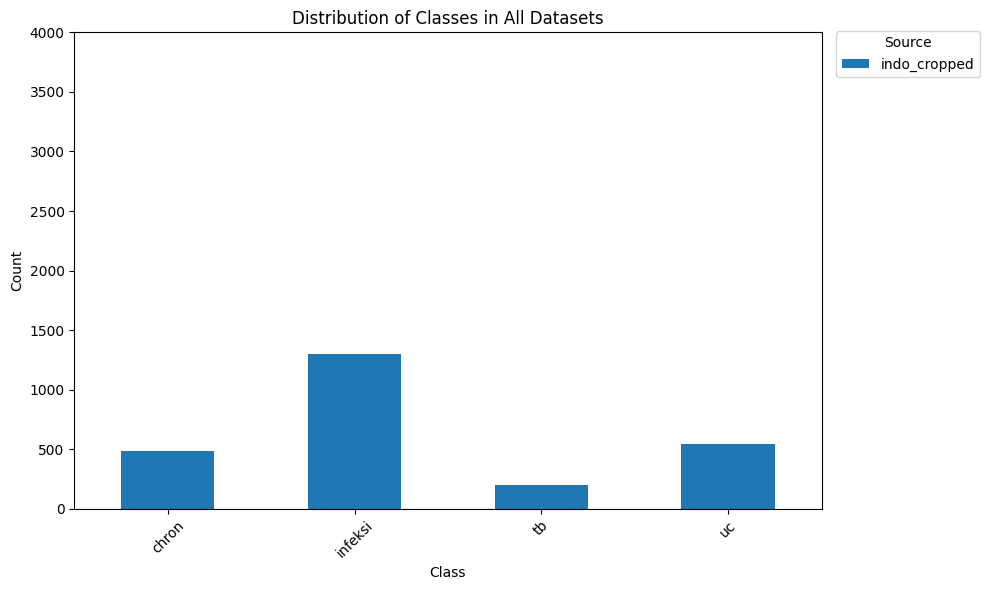

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = pd.concat([train_filenames_df, val_filenames_df, test_filenames_df], ignore_index=True)

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in All Datasets')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 4000)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


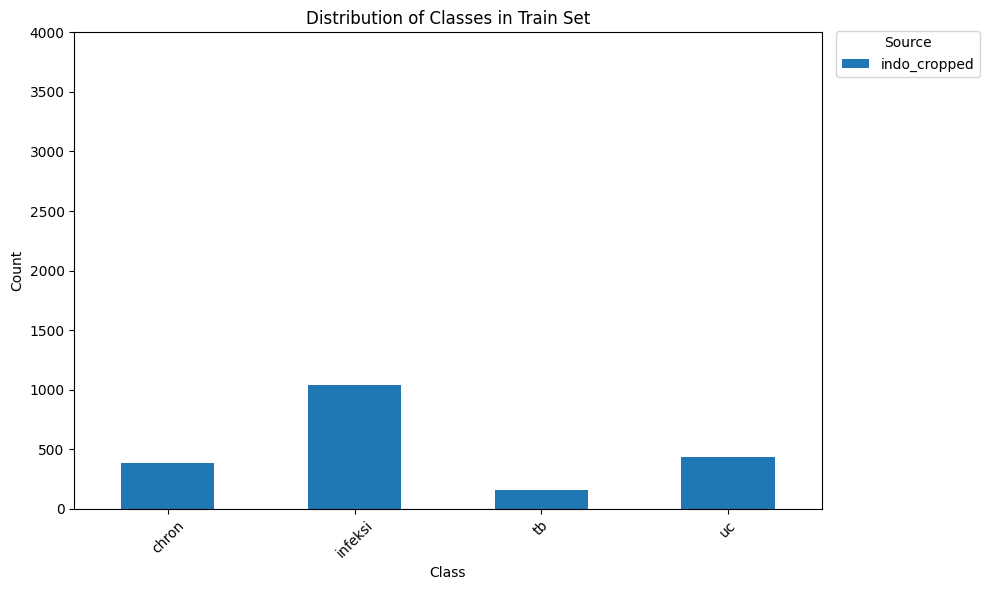

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = train_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Train Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 4000)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


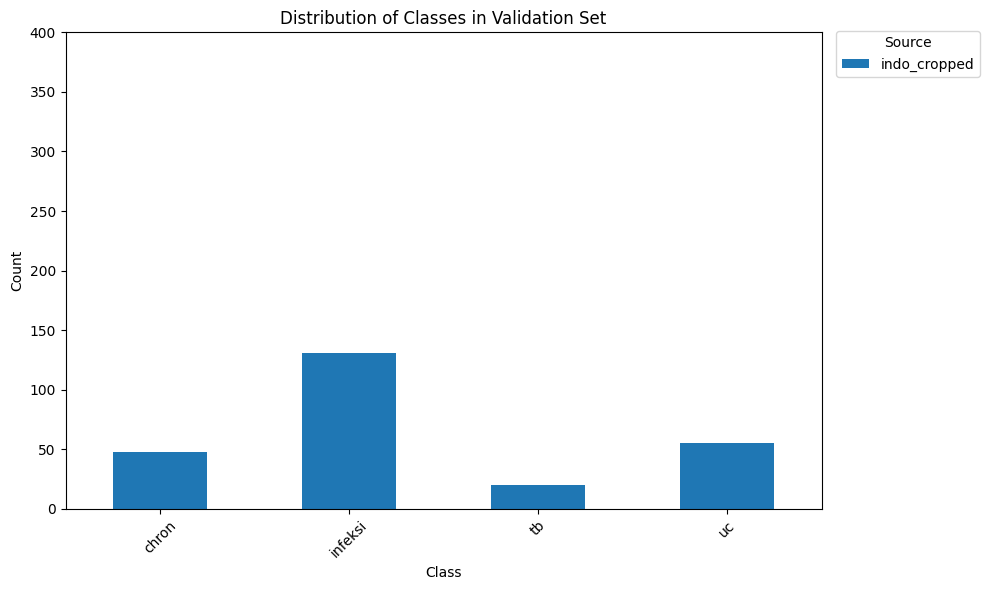

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = val_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 400)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


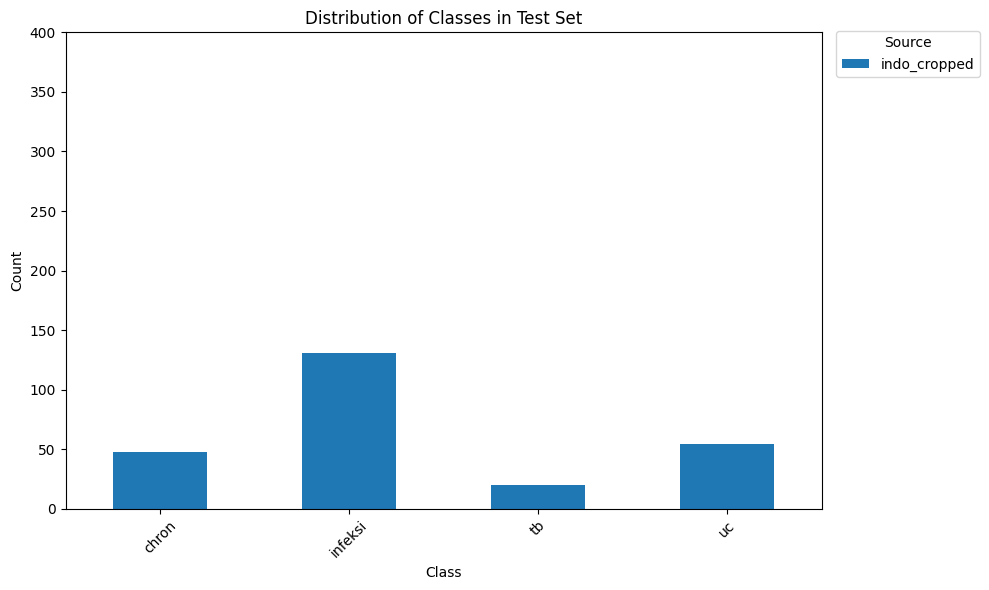

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = test_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 400)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pre Processor

In [25]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.preprocessing" in sys.modules:
    del sys.modules["src.preprocessing"]

In [26]:
from src.preprocessing import preprocess

target_input_size = tuple(PREPROCESSING_PARAMS['INPUT_SIZE'])
train_transform = preprocess(
    target_input_size=target_input_size,
    rotation_range=PREPROCESSING_PARAMS['ROTATION_RANGE'],
    width_shift_range=PREPROCESSING_PARAMS['WIDTH_SHIFT_RANGE'],
    height_shift_range=PREPROCESSING_PARAMS['HEIGHT_SHIFT_RANGE'],
    brightness_range=PREPROCESSING_PARAMS['BRIGHTNESS_RANGE'],
    zoom_range=PREPROCESSING_PARAMS['ZOOM_RANGE'],
    horizontal_flip=PREPROCESSING_PARAMS['HORIZONTAL_FLIP'],
    vertical_flip=PREPROCESSING_PARAMS['VERTICAL_FLIP'],
    channel_shift_range=PREPROCESSING_PARAMS['CHANNEL_SHIFT_RANGE'],
    fill_mode=PREPROCESSING_PARAMS['FILL_MODE'],
    shear_range=PREPROCESSING_PARAMS['SHEAR_RANGE']
    )

val_transform = preprocess(target_input_size=target_input_size) # only rescaling

In [27]:
from src.dataset import Dataset

temp_train_filenames_df = train_filenames_df.copy()
temp_val_filenames_df = val_filenames_df.copy()
temp_test_filenames_df = test_filenames_df.copy()

# Gw bikin gni karna takut 'class' yg lama dipake (well ada cara lbh baik tp ini biar cepet)
temp_train_filenames_df['class'] = temp_train_filenames_df['new_class']
temp_val_filenames_df['class'] = temp_val_filenames_df['new_class']
temp_test_filenames_df['class'] = temp_test_filenames_df['new_class']


train_dataset = Dataset(dataframe=temp_train_filenames_df, 
                        categories=DATASET_PARAMS['CATEGORIES'],
                        transform=train_transform, 
                        seed=42, 
                        shuffle=False)

val_dataset = Dataset(dataframe=temp_val_filenames_df, 
                      categories=DATASET_PARAMS['CATEGORIES'],
                      transform=val_transform, 
                      seed=42, 
                      shuffle=False)

test_dataset = Dataset(dataframe=temp_test_filenames_df, 
                      categories=DATASET_PARAMS['CATEGORIES'],
                      transform=val_transform, 
                      seed=42, 
                      shuffle=False)

## Train loader

In [28]:
from torch.utils.data.sampler import WeightedRandomSampler

def new_source(instance):
    if 'indo_cropped' in instance['source']:
        return 'indo'
    else:
        return 'foreign'

def combine_source_class(instance):
    # return f'{instance["source_str"]}_{instance["class"]}'
    return f'{instance["source_str"]}_{instance["new_class"]}'

train_filenames_df['source_str'] = train_filenames_df.apply(new_source, axis=1)
train_filenames_df['group_key'] = train_filenames_df.apply(combine_source_class, axis=1)

group_counts  = train_filenames_df["group_key"].value_counts()            
group_weights = 1.0 / group_counts 

# Normalize
group_weights = group_weights / group_weights.sum()

# group_weights['indo_uc'] = group_weights['indo_uc'] * 1.5
# group_weights['indo_tb'] = group_weights['indo_tb'] * 1.5
# group_weights['indo_chron'] = group_weights['indo_chron'] * 1.5

# group_weights['foreign_uc'] = group_weights['foreign_uc'] * 0.8
# group_weights['foreign_tb'] = group_weights['foreign_tb'] * 0.8
# group_weights['foreign_chron'] = group_weights['foreign_chron'] * 0.8

sample_weights = train_filenames_df["group_key"].map(group_weights).to_numpy()

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

In [29]:
group_weights

group_key
indo_uc_infeksi    0.269896
indo_chron_tb      0.730104
Name: count, dtype: float64

In [30]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, 
                          batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                          num_workers=TRAINING_PARAMS['NUM_WORKERS'],
                        #   shuffle=True,
                          sampler=sampler,
)

val_loader = DataLoader(val_dataset, 
                          batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                          shuffle=False, 
                          num_workers=TRAINING_PARAMS['NUM_WORKERS'])

#if test_dataset exist
if test_dataset:
    test_loader = DataLoader(test_dataset, 
                             batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                             shuffle=False, 
                             num_workers=TRAINING_PARAMS['NUM_WORKERS'])

### Inpect train data augmentation

In [31]:
import numpy as np

def visualise_dataloader(dl, id_to_label=None, with_outputs=True):
    total_num_images = len(dl.dataset)
    idxs_seen = []
    # class_0_batch_counts = []
    # class_1_batch_counts = []
    classes_batch_counts = {i: [] for i in range(len(id_to_label))} if id_to_label is not None else {0: [], 1: []}

    for i, batch in enumerate(dl):

        # idxs = batch[0][:, 0].tolist()
        classes = np.argmax(batch[1], axis=1)

        class_ids, class_counts = np.unique(classes, return_counts=True)
        class_ids = set(class_ids.tolist())
        class_counts = class_counts.tolist()

        # idxs_seen.extend(idxs)

        # if len(class_ids) == 2:
        #     class_0_batch_counts.append(class_counts[0])
        #     class_1_batch_counts.append(class_counts[1])
        # elif len(class_ids) == 1 and 0 in class_ids:
        #     class_0_batch_counts.append(class_counts[0])
        #     class_1_batch_counts.append(0)
        # elif len(class_ids) == 1 and 1 in class_ids:
        #     class_0_batch_counts.append(0)
        #     class_1_batch_counts.append(class_counts[0])
        # else:
            # raise ValueError("More than two classes detected")

        for class_id in range(len(id_to_label)):
            if class_id in class_ids:
                class_id_index = list(class_ids).index(class_id)
                classes_batch_counts[class_id].append(class_counts[class_id_index])
            else:
                classes_batch_counts[class_id].append(0)

    if with_outputs:
        fig, ax = plt.subplots(1, figsize=(15, 15))

        # ind = np.arange(len(class_0_batch_counts))
        ind = np.arange(len(classes_batch_counts[0]))
        width = 0.35

        # ax.bar(
        #     ind,
        #     class_0_batch_counts,
        #     width,
        #     label=(id_to_label[0] if id_to_label is not None else "0"),
        # )
        # ax.bar(
        #     ind + width,
        #     class_1_batch_counts,
        #     width,
        #     label=(id_to_label[1] if id_to_label is not None else "1"),
        # )
        
        for class_id, counts in classes_batch_counts.items():
            ax.bar(
                ind + (class_id * width),
                counts,
                width,
                label=(id_to_label[class_id] if id_to_label is not None else str(class_id)),
            )

        ax.set_xticks(ind, ind + 1)
        ax.set_xlabel("Batch index", fontsize=12)
        ax.set_ylabel("No. of images in batch", fontsize=12)
        ax.set_aspect("equal")

        plt.legend()
        plt.show()

        # num_images_seen = len(idxs_seen)

        # print(
        #     f'Avg Proportion of {(id_to_label[0] if id_to_label is not None else "Class 0")} per batch: {(np.array(class_0_batch_counts) / 10).mean()}'
        # )
        # print(
        #     f'Avg Proportion of {(id_to_label[1] if id_to_label is not None else "Class 1")} per batch: {(np.array(class_1_batch_counts) / 10).mean()}'
        # )
        for class_id, counts in classes_batch_counts.items():
            print(
                f'Avg Proportion of {(id_to_label[class_id] if id_to_label is not None else str(class_id))} per batch: {(np.array(counts)).mean() / len(batch[1])*100} percent'
            )
        print("=============")
        print(f"Num. unique images seen: {len(set(idxs_seen))}/{total_num_images}")

    return classes_batch_counts

In [32]:
# Nyalain klo mau coba liat persebaran kelas per batch, Kodeny ngambil punya orang makanny byk comment

# a = visualise_dataloader(train_loader, id_to_label=DATASET_PARAMS['CATEGORIES'], with_outputs=True)

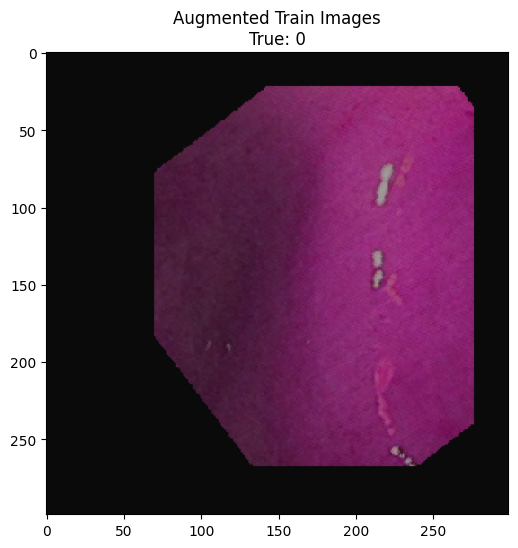

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
data, target = next(iter(train_loader))

img = data[random.randint(0, len(data) -1)].cpu().numpy()
img = np.transpose(img, (1, 2, 0))
img = img*255
plt.figure(figsize=(10, 6))
plt.title(f"Augmented Train Images\nTrue: {torch.argmax(target[random.randint(0, len(data) -1)], dim=0).item()}")
plt.imshow(img)
plt.show()

# Model

In [34]:
num_classes = len(categories)

# Compute weights for each class based on the training dataset with sklearn
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', 
                                      classes=np.arange(num_classes), 
                                    #   y=train_filenames_df['class'].map(lambda x: categories.index(x)))
                                      y=train_filenames_df['new_class'].map(lambda x: categories.index(x)))
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)

In [35]:
class_weights

tensor([0.6848, 1.8526], device='cuda:0')

### EfficientCapsNet

In [36]:
if MODEL_NAME == "CAPSNET":
    from src.model import EfficientCapsNet
    from src.loss import MarginLoss, marginLoss

    model = EfficientCapsNet(input_size=(MODEL_PARAMS['INPUT_SIZE']))
    loss = MarginLoss()
    # loss = marginLoss

### DenseNet

In [37]:
if MODEL_NAME == "DENSENET121":
    from src.densenet import DenseNet121
    from torch.nn import CrossEntropyLoss

    model = DenseNet121(num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
    loss = CrossEntropyLoss(weight=class_weights)

### ResNet

In [38]:
if MODEL_NAME == "RESNET50":
    from src.resnet import ResNet50
    from torch.nn import CrossEntropyLoss

    model = ResNet50(num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
    loss = CrossEntropyLoss(weight=class_weights)   

In [39]:
# Check number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Get number of trainable parameters
number_of_parameters = count_parameters(model)

# Convert to string for printing
number_of_parameters_str = f"{number_of_parameters:,}"

print(f"Number of trainable parameters: {number_of_parameters_str}")

Number of trainable parameters: 7,980,906


# Training

## Metrics

In [40]:
len(train_loader)*TRAINING_PARAMS['NUM_EPOCHS']

3200

In [41]:
# Optimizer
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=TRAINING_PARAMS['LEARNING_RATE'])

from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau, ExponentialLR

# lr_scheduler = OneCycleLR(optimizer,
#                           max_lr=TRAINING_PARAMS['LEARNING_RATE']*2,    
#                           steps_per_epoch=len(train_loader),
#                           epochs=TRAINING_PARAMS['NUM_EPOCHS'],
#                           pct_start=0.2,
#                           div_factor=5,
#                           final_div_factor=20000,
#                           )

# lr_scheduler = ReduceLROnPlateau(optimizer,
#                                  mode='min',
#                                  factor=0.9,
#                                  patience=3)

# lr_scheduler = ExponentialLR(optimizer,
                            #  gamma=0.95)

lr_scheduler = None

# use torcheval metrics
# metrics
from torcheval.metrics import (
    MulticlassAccuracy,
    MulticlassF1Score,
    MulticlassPrecision,
    MulticlassAUROC,
    MulticlassAUPRC,
    MulticlassRecall    
)

# Metrics
from src.metrics import (
    MulticlassMCC,
    MulticlassSpecificity
)

metrics = {
    "mcc": MulticlassMCC(num_classes=num_classes, device=DEVICE),
    "auprc": MulticlassAUPRC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "auroc": MulticlassAUROC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "accuracy": MulticlassAccuracy(num_classes=num_classes, device=DEVICE),
    "f1_score": MulticlassF1Score(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "precision": MulticlassPrecision(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "recall": MulticlassRecall(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "specificity": MulticlassSpecificity(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE)
}

In [42]:
# # Set only classifier to be trainable
# for param in model.parameters():
#     param.requires_grad = True

# for param in model.classifier.parameters():
#     param.requires_grad = True
    
# # Unfreeze unless first layer in model.densenet_model.features
# for param in model.densenet_model.features[-4:].parameters():
#     param.requires_grad = True
    
    
# Get number of trainable parameters
number_of_parameters = count_parameters(model)

# Convert to string for printing
number_of_parameters_str = f"{number_of_parameters:,}"

print(f"Number of trainable parameters: {number_of_parameters_str}")

Number of trainable parameters: 7,980,906


In [ ]:
from src.train import train

dropout_rates = [0.20, 0.30, 0.40, 0.50]
weights = [None, class_weights]
lrs = [1e-3, 1e-4, 5e-5, 2.5e-5, 1e-5, 5e-6, 2.5e-6, 1e-6]

best_f1 = 0
best_hyperparam = None

last_best_saved_model_path = ""
last_best_training_history_path = ""

for dropout_rate in dropout_rates:
    for weight in weights:
        for lr in lrs:
            print(f"Training with dropout_rate={dropout_rate}, weight={'yes' if weight is not None else 'no'}, lr={lr}")

            if MODEL_NAME == "DENSENET121":
                from src.densenet import DenseNet121
                from torch.nn import CrossEntropyLoss

                model = DenseNet121(num_classes=num_classes, dropout_rate=dropout_rate)
                loss = CrossEntropyLoss(weight=weight)

            optimizer = AdamW(model.parameters(), lr=lr)

            metrics = {
                "mcc": MulticlassMCC(num_classes=num_classes, device=DEVICE),
                "auprc": MulticlassAUPRC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
                "auroc": MulticlassAUROC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
                "accuracy": MulticlassAccuracy(num_classes=num_classes, device=DEVICE),
                "f1_score": MulticlassF1Score(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
                "precision": MulticlassPrecision(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
                "recall": MulticlassRecall(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
                "specificity": MulticlassSpecificity(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE)
            }

            history = train(model=model, 
                train_loader=train_loader, 
                val_loader=val_loader, 
                criterion=loss, 
                optimizer=optimizer, 
                num_epochs=TRAINING_PARAMS['NUM_EPOCHS'], 
                device=DEVICE,
                metrics=metrics,
                print_every=TRAINING_PARAMS['PRINT_EVERY'],
                save_patience=TRAINING_PARAMS['SAVE_PATIENCE'],
                save_path=TRAINING_PARAMS['SAVE_PATH'],
                save_model=TRAINING_PARAMS['SAVE_MODEL'],
                save_metrics=TRAINING_PARAMS['SAVE_METRICS'],
                scheduler=lr_scheduler
                )

            max_val_f1_score = max(history['val_metrics']['f1_score'])
            argmax_val_f1_score = np.argmax(history['val_metrics']['f1_score']) + 1

            model_saved_path = os.path.join(TRAINING_PARAMS['SAVE_PATH'], f"epoch_{argmax_val_f1_score}.pth")
            renamed_model_saved_path = os.path.join(TRAINING_PARAMS['SAVE_PATH'], f"dropout{str(dropout_rate).replace('.', '')}_weight{'yes' if weight is not None else 'no'}_lr{str(lr).replace('.', '')}_epoch_{argmax_val_f1_score}_f1_{max_val_f1_score:.4f}.pth")
            os.rename(model_saved_path, renamed_model_saved_path)

            training_history_saved_path = os.path.join(TRAINING_PARAMS['SAVE_PATH'], f"training_history.json")
            renamed_training_history_saved_path = os.path.join(TRAINING_PARAMS['SAVE_PATH'], f"dropout{str(dropout_rate).replace('.', '')}_weight{'yes' if weight is not None else 'no'}_lr{str(lr).replace('.', '')}_training_history.json")
            os.rename(training_history_saved_path, renamed_training_history_saved_path)

            if max_val_f1_score > best_f1:
                best_f1 = max_val_f1_score
                best_hyperparam = {
                    'dropout_rate': dropout_rate,
                    'weight': weight,
                    'lr': lr
                }

                # Delete previous best model and training history
                if last_best_saved_model_path:
                    os.remove(last_best_saved_model_path)
                if last_best_training_history_path:
                    os.remove(last_best_training_history_path)

                last_best_saved_model_path = renamed_model_saved_path
                last_best_training_history_path = renamed_training_history_saved_path
            else:
                os.remove(renamed_model_saved_path)
                os.remove(renamed_training_history_saved_path)


Training with dropout_rate=0.2, weight=no, lr=0.001
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:50, 36.88s/it, learning_rate=0.001, train_loss=0.662, train_metrics=mcc: 0.2971, auprc: 0.6594, auroc: 0.6814, accuracy: 0.6485, f1_score: 0.6485, precision: 0.6486, recall: 0.6485, specificity: 0.6485, val_loss=0.863, val_metrics=mcc: 0.0000, auprc: 0.5560, auroc: 0.5579, accuracy: 0.2677, f1_score: 0.2112, precision: 0.1339, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<59:34, 36.47s/it, learning_rate=0.001, train_loss=0.602, train_metrics=mcc: 0.3694, auprc: 0.7164, auroc: 0.7317, accuracy: 0.6851, f1_score: 0.6847, precision: 0.6846, recall: 0.6847, specificity: 0.6847, val_loss=0.749, val_metrics=mcc: 0.0000, auprc: 0.4713, auroc: 0.4351, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:48<58:28, 36.17s/it, learning_rate=0.001, train_loss=0.589, train_metrics=mcc: 0.3682, auprc: 0.7348, auroc: 0.7510, accuracy: 0.6841, f1_score: 0.6841, precision: 0.6841, recall: 0.6841, specificity: 0.6841, val_loss=0.65, val_metrics=mcc: 0.2281, auprc: 0.6224, auroc: 0.6774, accuracy: 0.6260, f1_score: 0.5923, precision: 0.6016, recall: 0.6280, specificity: 0.6280] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:24<57:42, 36.06s/it, learning_rate=0.001, train_loss=0.551, train_metrics=mcc: 0.4377, auprc: 0.7779, auroc: 0.7882, accuracy: 0.7187, f1_score: 0.7187, precision: 0.7189, recall: 0.7188, specificity: 0.7188, val_loss=0.857, val_metrics=mcc: 0.3358, auprc: 0.7663, auroc: 0.8031, accuracy: 0.6102, f1_score: 0.6008, precision: 0.6505, recall: 0.6872, specificity: 0.6872]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   5%|▌         | 5/100 [03:00<56:55, 35.95s/it, learning_rate=0.001, train_loss=0.535, train_metrics=mcc: 0.4738, auprc: 0.7898, auroc: 0.8054, accuracy: 0.7370, f1_score: 0.7358, precision: 0.7381, recall: 0.7357, specificity: 0.7357, val_loss=0.461, val_metrics=mcc: 0.5011, auprc: 0.7867, auroc: 0.8134, accuracy: 0.8110, f1_score: 0.7493, precision: 0.7612, recall: 0.7404, specificity: 0.7404]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:   7%|▋         | 7/100 [04:12<55:36, 35.88s/it, learning_rate=0.001, train_loss=0.567, train_metrics=mcc: 0.4206, auprc: 0.7553, auroc: 0.7750, accuracy: 0.7098, f1_score: 0.7096, precision: 0.7106, recall: 0.7100, specificity: 0.7100, val_loss=0.456, val_metrics=mcc: 0.5339, auprc: 0.8318, auroc: 0.8578, accuracy: 0.8189, f1_score: 0.7669, precision: 0.7695, recall: 0.7644, specificity: 0.7644]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:  35%|███▌      | 35/100 [21:46<40:25, 37.31s/it, learning_rate=0.001, train_loss=0.468, train_metrics=mcc: 0.5632, auprc: 0.8557, auroc: 0.8596, accuracy: 0.7815, f1_score: 0.7815, precision: 0.7816, recall: 0.7816, specificity: 0.7816, val_loss=0.752, val_metrics=mcc: 0.4524, auprc: 0.7783, auroc: 0.8361, accuracy: 0.6654, f1_score: 0.6564, precision: 0.7023, recall: 0.7528, specificity: 0.7528]


Early stopping triggered after 30 epochs with no improvement since epoch 7.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=0.0001
Training...


Epochs:   1%|          | 1/100 [00:37<1:01:16, 37.14s/it, learning_rate=0.0001, train_loss=0.586, train_metrics=mcc: 0.3674, auprc: 0.7223, auroc: 0.7335, accuracy: 0.6826, f1_score: 0.6822, precision: 0.6844, recall: 0.6830, specificity: 0.6830, val_loss=0.598, val_metrics=mcc: -0.0661, auprc: 0.5117, auroc: 0.4977, accuracy: 0.7205, f1_score: 0.4188, precision: 0.3645, recall: 0.4919, specificity: 0.4919]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:14<1:00:45, 37.20s/it, learning_rate=0.0001, train_loss=0.483, train_metrics=mcc: 0.5401, auprc: 0.8308, auroc: 0.8372, accuracy: 0.7701, f1_score: 0.7701, precision: 0.7700, recall: 0.7701, specificity: 0.7701, val_loss=0.814, val_metrics=mcc: 0.3046, auprc: 0.6948, auroc: 0.7297, accuracy: 0.5906, f1_score: 0.5822, precision: 0.6371, recall: 0.6691, specificity: 0.6691] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:51<59:53, 37.04s/it, learning_rate=0.0001, train_loss=0.5, train_metrics=mcc: 0.5046, auprc: 0.8227, auroc: 0.8298, accuracy: 0.7523, f1_score: 0.7521, precision: 0.7526, recall: 0.7521, specificity: 0.7521, val_loss=0.486, val_metrics=mcc: 0.5372, auprc: 0.8214, auroc: 0.8408, accuracy: 0.7913, f1_score: 0.7590, precision: 0.7468, recall: 0.7922, specificity: 0.7922]    

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:28<59:21, 37.10s/it, learning_rate=0.0001, train_loss=0.471, train_metrics=mcc: 0.5382, auprc: 0.8402, auroc: 0.8449, accuracy: 0.7692, f1_score: 0.7691, precision: 0.7692, recall: 0.7691, specificity: 0.7691, val_loss=0.407, val_metrics=mcc: 0.5425, auprc: 0.8498, auroc: 0.8590, accuracy: 0.8189, f1_score: 0.7712, precision: 0.7688, recall: 0.7737, specificity: 0.7737]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   5%|▌         | 5/100 [03:05<58:53, 37.20s/it, learning_rate=0.0001, train_loss=0.443, train_metrics=mcc: 0.5956, auprc: 0.8673, auroc: 0.8673, accuracy: 0.7978, f1_score: 0.7978, precision: 0.7978, recall: 0.7978, specificity: 0.7978, val_loss=0.43, val_metrics=mcc: 0.5784, auprc: 0.8535, auroc: 0.8744, accuracy: 0.8228, f1_score: 0.7863, precision: 0.7747, recall: 0.8044, specificity: 0.8044] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:   7%|▋         | 7/100 [04:20<57:40, 37.20s/it, learning_rate=0.0001, train_loss=0.403, train_metrics=mcc: 0.6362, auprc: 0.8929, auroc: 0.8925, accuracy: 0.8181, f1_score: 0.8180, precision: 0.8182, recall: 0.8180, specificity: 0.8180, val_loss=0.392, val_metrics=mcc: 0.5744, auprc: 0.8606, auroc: 0.8711, accuracy: 0.8346, f1_score: 0.7871, precision: 0.7900, recall: 0.7845, specificity: 0.7845]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:   8%|▊         | 8/100 [04:56<56:29, 36.84s/it, learning_rate=0.0001, train_loss=0.41, train_metrics=mcc: 0.6145, auprc: 0.8852, auroc: 0.8873, accuracy: 0.8072, f1_score: 0.8072, precision: 0.8073, recall: 0.8072, specificity: 0.8072, val_loss=0.354, val_metrics=mcc: 0.6410, auprc: 0.8781, auroc: 0.8919, accuracy: 0.8622, f1_score: 0.8200, precision: 0.8286, recall: 0.8126, specificity: 0.8126] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  21%|██        | 21/100 [12:47<48:03, 36.50s/it, learning_rate=0.0001, train_loss=0.252, train_metrics=mcc: 0.7885, auprc: 0.9598, auroc: 0.9589, accuracy: 0.8942, f1_score: 0.8942, precision: 0.8942, recall: 0.8943, specificity: 0.8943, val_loss=0.427, val_metrics=mcc: 0.6547, auprc: 0.8813, auroc: 0.8924, accuracy: 0.8543, f1_score: 0.8243, precision: 0.8110, recall: 0.8446, specificity: 0.8446]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_21.pth


Epochs:  31%|███       | 31/100 [18:50<41:49, 36.37s/it, learning_rate=0.0001, train_loss=0.165, train_metrics=mcc: 0.8685, auprc: 0.9831, auroc: 0.9827, accuracy: 0.9343, f1_score: 0.9342, precision: 0.9346, recall: 0.9339, specificity: 0.9339, val_loss=0.43, val_metrics=mcc: 0.6616, auprc: 0.8956, auroc: 0.9113, accuracy: 0.8701, f1_score: 0.8303, precision: 0.8392, recall: 0.8227, specificity: 0.8227] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_31.pth


Epochs:  48%|████▊     | 48/100 [29:08<31:23, 36.23s/it, learning_rate=0.0001, train_loss=0.0983, train_metrics=mcc: 0.9211, auprc: 0.9939, auroc: 0.9938, accuracy: 0.9605, f1_score: 0.9605, precision: 0.9606, recall: 0.9605, specificity: 0.9605, val_loss=0.41, val_metrics=mcc: 0.6846, auprc: 0.9087, auroc: 0.9321, accuracy: 0.8780, f1_score: 0.8421, precision: 0.8473, recall: 0.8374, specificity: 0.8374]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_48.pth


Epochs:  76%|███████▌  | 76/100 [46:50<14:47, 36.98s/it, learning_rate=0.0001, train_loss=0.0453, train_metrics=mcc: 0.9723, auprc: 0.9986, auroc: 0.9986, accuracy: 0.9862, f1_score: 0.9862, precision: 0.9862, recall: 0.9861, specificity: 0.9861, val_loss=0.779, val_metrics=mcc: 0.5783, auprc: 0.8552, auroc: 0.8820, accuracy: 0.8346, f1_score: 0.7891, precision: 0.7891, recall: 0.7891, specificity: 0.7891]


Early stopping triggered after 30 epochs with no improvement since epoch 48.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=5e-05
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:02, 36.39s/it, learning_rate=5e-5, train_loss=0.608, train_metrics=mcc: 0.3069, auprc: 0.6964, auroc: 0.6993, accuracy: 0.6535, f1_score: 0.6531, precision: 0.6537, recall: 0.6532, specificity: 0.6532, val_loss=0.605, val_metrics=mcc: 0.0000, auprc: 0.5209, auroc: 0.5184, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:19, 36.32s/it, learning_rate=5e-5, train_loss=0.523, train_metrics=mcc: 0.4762, auprc: 0.7952, auroc: 0.8010, accuracy: 0.7380, f1_score: 0.7380, precision: 0.7381, recall: 0.7381, specificity: 0.7381, val_loss=0.57, val_metrics=mcc: 0.2297, auprc: 0.6020, auroc: 0.6846, accuracy: 0.7205, f1_score: 0.6104, precision: 0.6269, recall: 0.6039, specificity: 0.6039]   

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<58:44, 36.33s/it, learning_rate=5e-5, train_loss=0.503, train_metrics=mcc: 0.4971, auprc: 0.8201, auroc: 0.8189, accuracy: 0.7494, f1_score: 0.7483, precision: 0.7491, recall: 0.7480, specificity: 0.7480, val_loss=0.464, val_metrics=mcc: 0.5248, auprc: 0.7621, auroc: 0.8179, accuracy: 0.8071, f1_score: 0.7615, precision: 0.7547, recall: 0.7703, specificity: 0.7703]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:25<57:58, 36.23s/it, learning_rate=5e-5, train_loss=0.49, train_metrics=mcc: 0.5311, auprc: 0.8317, auroc: 0.8317, accuracy: 0.7662, f1_score: 0.7655, precision: 0.7657, recall: 0.7654, specificity: 0.7654, val_loss=0.43, val_metrics=mcc: 0.5903, auprc: 0.8248, auroc: 0.8541, accuracy: 0.8386, f1_score: 0.7951, precision: 0.7938, recall: 0.7965, specificity: 0.7965]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   7%|▋         | 7/100 [04:14<56:19, 36.34s/it, learning_rate=5e-5, train_loss=0.444, train_metrics=mcc: 0.5653, auprc: 0.8664, auroc: 0.8639, accuracy: 0.7825, f1_score: 0.7825, precision: 0.7826, recall: 0.7826, specificity: 0.7826, val_loss=0.37, val_metrics=mcc: 0.6007, auprc: 0.8659, auroc: 0.8755, accuracy: 0.8504, f1_score: 0.7973, precision: 0.8208, recall: 0.7812, specificity: 0.7812]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:  10%|█         | 10/100 [06:03<54:37, 36.41s/it, learning_rate=5e-5, train_loss=0.414, train_metrics=mcc: 0.6143, auprc: 0.8846, auroc: 0.8856, accuracy: 0.8072, f1_score: 0.8068, precision: 0.8066, recall: 0.8077, specificity: 0.8077, val_loss=0.356, val_metrics=mcc: 0.6408, auprc: 0.8725, auroc: 0.8870, accuracy: 0.8661, f1_score: 0.8145, precision: 0.8516, recall: 0.7920, specificity: 0.7920]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  14%|█▍        | 14/100 [08:28<52:08, 36.38s/it, learning_rate=5e-5, train_loss=0.364, train_metrics=mcc: 0.6638, auprc: 0.9133, auroc: 0.9121, accuracy: 0.8319, f1_score: 0.8319, precision: 0.8319, recall: 0.8319, specificity: 0.8319, val_loss=0.379, val_metrics=mcc: 0.6322, auprc: 0.8596, auroc: 0.8800, accuracy: 0.8583, f1_score: 0.8158, precision: 0.8224, recall: 0.8099, specificity: 0.8099]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  19%|█▉        | 19/100 [11:30<49:00, 36.30s/it, learning_rate=5e-5, train_loss=0.305, train_metrics=mcc: 0.7332, auprc: 0.9396, auroc: 0.9392, accuracy: 0.8665, f1_score: 0.8665, precision: 0.8668, recall: 0.8665, specificity: 0.8665, val_loss=0.343, val_metrics=mcc: 0.6456, auprc: 0.8815, auroc: 0.9103, accuracy: 0.8583, f1_score: 0.8225, precision: 0.8172, recall: 0.8286, specificity: 0.8286]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_19.pth


Epochs:  47%|████▋     | 47/100 [29:04<32:47, 37.12s/it, learning_rate=5e-5, train_loss=0.136, train_metrics=mcc: 0.8923, auprc: 0.9882, auroc: 0.9878, accuracy: 0.9461, f1_score: 0.9461, precision: 0.9461, recall: 0.9462, specificity: 0.9462, val_loss=0.507, val_metrics=mcc: 0.6341, auprc: 0.8513, auroc: 0.8956, accuracy: 0.8504, f1_score: 0.8159, precision: 0.8065, recall: 0.8279, specificity: 0.8279]


Early stopping triggered after 30 epochs with no improvement since epoch 19.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=2.5e-05
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:10, 36.47s/it, learning_rate=2.5e-5, train_loss=0.676, train_metrics=mcc: 0.2082, auprc: 0.6248, auroc: 0.6341, accuracy: 0.5872, f1_score: 0.5489, precision: 0.6273, recall: 0.5851, specificity: 0.5851, val_loss=0.607, val_metrics=mcc: 0.0000, auprc: 0.5352, auroc: 0.5455, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:11, 36.24s/it, learning_rate=2.5e-5, train_loss=0.547, train_metrics=mcc: 0.4724, auprc: 0.7677, auroc: 0.7735, accuracy: 0.7360, f1_score: 0.7357, precision: 0.7367, recall: 0.7358, specificity: 0.7358, val_loss=0.634, val_metrics=mcc: 0.2689, auprc: 0.6227, auroc: 0.6704, accuracy: 0.6457, f1_score: 0.6128, precision: 0.6199, recall: 0.6508, specificity: 0.6508]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:48<58:40, 36.29s/it, learning_rate=2.5e-5, train_loss=0.508, train_metrics=mcc: 0.5166, auprc: 0.8049, auroc: 0.8140, accuracy: 0.7583, f1_score: 0.7583, precision: 0.7583, recall: 0.7583, specificity: 0.7583, val_loss=0.472, val_metrics=mcc: 0.4629, auprc: 0.7573, auroc: 0.8023, accuracy: 0.7874, f1_score: 0.7314, precision: 0.7293, recall: 0.7336, specificity: 0.7336]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:25<58:11, 36.37s/it, learning_rate=2.5e-5, train_loss=0.502, train_metrics=mcc: 0.5186, auprc: 0.8120, auroc: 0.8172, accuracy: 0.7593, f1_score: 0.7592, precision: 0.7594, recall: 0.7592, specificity: 0.7592, val_loss=0.454, val_metrics=mcc: 0.5370, auprc: 0.8117, auroc: 0.8397, accuracy: 0.8110, f1_score: 0.7674, precision: 0.7596, recall: 0.7777, specificity: 0.7777]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   8%|▊         | 8/100 [04:50<55:45, 36.36s/it, learning_rate=2.5e-5, train_loss=0.458, train_metrics=mcc: 0.5591, auprc: 0.8511, auroc: 0.8530, accuracy: 0.7795, f1_score: 0.7795, precision: 0.7795, recall: 0.7796, specificity: 0.7796, val_loss=0.418, val_metrics=mcc: 0.5470, auprc: 0.8256, auroc: 0.8557, accuracy: 0.8189, f1_score: 0.7732, precision: 0.7687, recall: 0.7784, specificity: 0.7784]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  10%|█         | 10/100 [06:03<54:36, 36.40s/it, learning_rate=2.5e-5, train_loss=0.429, train_metrics=mcc: 0.5966, auprc: 0.8709, auroc: 0.8733, accuracy: 0.7983, f1_score: 0.7983, precision: 0.7983, recall: 0.7983, specificity: 0.7983, val_loss=0.395, val_metrics=mcc: 0.5582, auprc: 0.8299, auroc: 0.8712, accuracy: 0.8268, f1_score: 0.7791, precision: 0.7791, recall: 0.7791, specificity: 0.7791]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  11%|█         | 11/100 [06:39<53:59, 36.40s/it, learning_rate=2.5e-5, train_loss=0.449, train_metrics=mcc: 0.5759, auprc: 0.8569, auroc: 0.8600, accuracy: 0.7879, f1_score: 0.7879, precision: 0.7879, recall: 0.7879, specificity: 0.7879, val_loss=0.404, val_metrics=mcc: 0.5947, auprc: 0.8177, auroc: 0.8623, accuracy: 0.8425, f1_score: 0.7973, precision: 0.8002, recall: 0.7945, specificity: 0.7945]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  15%|█▌        | 15/100 [09:05<51:29, 36.35s/it, learning_rate=2.5e-5, train_loss=0.38, train_metrics=mcc: 0.6428, auprc: 0.9001, auroc: 0.9014, accuracy: 0.8206, f1_score: 0.8206, precision: 0.8215, recall: 0.8213, specificity: 0.8213, val_loss=0.379, val_metrics=mcc: 0.6339, auprc: 0.8433, auroc: 0.8754, accuracy: 0.8622, f1_score: 0.8143, precision: 0.8364, recall: 0.7986, specificity: 0.7986] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  25%|██▌       | 25/100 [15:08<45:26, 36.35s/it, learning_rate=2.5e-5, train_loss=0.312, train_metrics=mcc: 0.7224, auprc: 0.9373, auroc: 0.9349, accuracy: 0.8611, f1_score: 0.8611, precision: 0.8613, recall: 0.8611, specificity: 0.8611, val_loss=0.38, val_metrics=mcc: 0.6555, auprc: 0.8663, auroc: 0.8938, accuracy: 0.8661, f1_score: 0.8277, precision: 0.8309, recall: 0.8246, specificity: 0.8246] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_25.pth


Epochs:  53%|█████▎    | 53/100 [32:47<29:04, 37.12s/it, learning_rate=2.5e-5, train_loss=0.189, train_metrics=mcc: 0.8567, auprc: 0.9770, auroc: 0.9767, accuracy: 0.9283, f1_score: 0.9283, precision: 0.9284, recall: 0.9283, specificity: 0.9283, val_loss=0.497, val_metrics=mcc: 0.5767, auprc: 0.8588, auroc: 0.8928, accuracy: 0.8189, f1_score: 0.7841, precision: 0.7714, recall: 0.8064, specificity: 0.8064]


Early stopping triggered after 30 epochs with no improvement since epoch 25.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=1e-05
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:52, 36.89s/it, learning_rate=1e-5, train_loss=0.697, train_metrics=mcc: 0.0540, auprc: 0.5456, auroc: 0.5397, accuracy: 0.5269, f1_score: 0.5265, precision: 0.5270, recall: 0.5271, specificity: 0.5271, val_loss=0.636, val_metrics=mcc: -0.0539, auprc: 0.5017, auroc: 0.4934, accuracy: 0.7244, f1_score: 0.4201, precision: 0.3651, recall: 0.4946, specificity: 0.4946]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<1:00:26, 37.00s/it, learning_rate=1e-5, train_loss=0.644, train_metrics=mcc: 0.2557, auprc: 0.6359, auroc: 0.6383, accuracy: 0.6283, f1_score: 0.6274, precision: 0.6282, recall: 0.6275, specificity: 0.6275, val_loss=0.621, val_metrics=mcc: 0.1926, auprc: 0.5834, auroc: 0.5967, accuracy: 0.7087, f1_score: 0.5916, precision: 0.6073, recall: 0.5865, specificity: 0.5865] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:51<59:51, 37.03s/it, learning_rate=1e-5, train_loss=0.605, train_metrics=mcc: 0.3571, auprc: 0.6928, auroc: 0.7024, accuracy: 0.6787, f1_score: 0.6785, precision: 0.6786, recall: 0.6785, specificity: 0.6785, val_loss=0.603, val_metrics=mcc: 0.2989, auprc: 0.6840, auroc: 0.7045, accuracy: 0.6850, f1_score: 0.6398, precision: 0.6365, recall: 0.6637, specificity: 0.6637]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:28<59:29, 37.18s/it, learning_rate=1e-5, train_loss=0.581, train_metrics=mcc: 0.3810, auprc: 0.7350, auroc: 0.7352, accuracy: 0.6915, f1_score: 0.6905, precision: 0.6905, recall: 0.6905, specificity: 0.6905, val_loss=0.588, val_metrics=mcc: 0.3995, auprc: 0.7406, auroc: 0.7597, accuracy: 0.7047, f1_score: 0.6765, precision: 0.6783, recall: 0.7238, specificity: 0.7238]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   8%|▊         | 8/100 [04:52<55:30, 36.20s/it, learning_rate=1e-5, train_loss=0.508, train_metrics=mcc: 0.4988, auprc: 0.8095, auroc: 0.8138, accuracy: 0.7494, f1_score: 0.7494, precision: 0.7494, recall: 0.7494, specificity: 0.7494, val_loss=0.558, val_metrics=mcc: 0.4174, auprc: 0.7950, auroc: 0.8252, accuracy: 0.7008, f1_score: 0.6777, precision: 0.6853, recall: 0.7351, specificity: 0.7351]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:   9%|▉         | 9/100 [05:28<54:52, 36.18s/it, learning_rate=1e-5, train_loss=0.519, train_metrics=mcc: 0.4906, auprc: 0.7992, auroc: 0.8045, accuracy: 0.7449, f1_score: 0.7449, precision: 0.7453, recall: 0.7453, specificity: 0.7453, val_loss=0.506, val_metrics=mcc: 0.4898, auprc: 0.8028, auroc: 0.8305, accuracy: 0.7598, f1_score: 0.7296, precision: 0.7216, recall: 0.7707, specificity: 0.7707]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_9.pth


Epochs:  14%|█▍        | 14/100 [08:30<52:10, 36.41s/it, learning_rate=1e-5, train_loss=0.496, train_metrics=mcc: 0.5108, auprc: 0.8232, auroc: 0.8251, accuracy: 0.7553, f1_score: 0.7553, precision: 0.7554, recall: 0.7555, specificity: 0.7555, val_loss=0.459, val_metrics=mcc: 0.5134, auprc: 0.8190, auroc: 0.8459, accuracy: 0.7913, f1_score: 0.7521, precision: 0.7409, recall: 0.7736, specificity: 0.7736]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  19%|█▉        | 19/100 [11:35<49:59, 37.03s/it, learning_rate=1e-5, train_loss=0.454, train_metrics=mcc: 0.5640, auprc: 0.8561, auroc: 0.8570, accuracy: 0.7820, f1_score: 0.7820, precision: 0.7820, recall: 0.7820, specificity: 0.7820, val_loss=0.42, val_metrics=mcc: 0.5125, auprc: 0.8218, auroc: 0.8523, accuracy: 0.8031, f1_score: 0.7556, precision: 0.7497, recall: 0.7630, specificity: 0.7630] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_19.pth


Epochs:  20%|██        | 20/100 [12:12<49:25, 37.07s/it, learning_rate=1e-5, train_loss=0.436, train_metrics=mcc: 0.5887, auprc: 0.8731, auroc: 0.8675, accuracy: 0.7944, f1_score: 0.7944, precision: 0.7944, recall: 0.7944, specificity: 0.7944, val_loss=0.405, val_metrics=mcc: 0.5216, auprc: 0.8263, auroc: 0.8578, accuracy: 0.8150, f1_score: 0.7606, precision: 0.7646, recall: 0.7570, specificity: 0.7570]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  21%|██        | 21/100 [12:49<48:43, 37.00s/it, learning_rate=1e-5, train_loss=0.433, train_metrics=mcc: 0.5828, auprc: 0.8695, auroc: 0.8705, accuracy: 0.7914, f1_score: 0.7914, precision: 0.7914, recall: 0.7914, specificity: 0.7914, val_loss=0.407, val_metrics=mcc: 0.5470, auprc: 0.8356, auroc: 0.8624, accuracy: 0.8189, f1_score: 0.7732, precision: 0.7687, recall: 0.7784, specificity: 0.7784]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_21.pth


Epochs:  30%|███       | 30/100 [18:15<42:12, 36.19s/it, learning_rate=1e-5, train_loss=0.422, train_metrics=mcc: 0.6233, auprc: 0.8752, auroc: 0.8787, accuracy: 0.8107, f1_score: 0.8107, precision: 0.8115, recall: 0.8118, specificity: 0.8118, val_loss=0.405, val_metrics=mcc: 0.5546, auprc: 0.8338, auroc: 0.8612, accuracy: 0.8228, f1_score: 0.7772, precision: 0.7736, recall: 0.7811, specificity: 0.7811]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_30.pth


Epochs:  31%|███       | 31/100 [18:51<41:33, 36.14s/it, learning_rate=1e-5, train_loss=0.413, train_metrics=mcc: 0.6319, auprc: 0.8805, auroc: 0.8836, accuracy: 0.8156, f1_score: 0.8156, precision: 0.8157, recall: 0.8162, specificity: 0.8162, val_loss=0.401, val_metrics=mcc: 0.5827, auprc: 0.8311, auroc: 0.8586, accuracy: 0.8386, f1_score: 0.7912, precision: 0.7956, recall: 0.7872, specificity: 0.7872]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_31.pth


Epochs:  32%|███▏      | 32/100 [19:28<41:03, 36.23s/it, learning_rate=1e-5, train_loss=0.383, train_metrics=mcc: 0.6646, auprc: 0.9023, auroc: 0.9032, accuracy: 0.8324, f1_score: 0.8323, precision: 0.8322, recall: 0.8323, specificity: 0.8323, val_loss=0.397, val_metrics=mcc: 0.5998, auprc: 0.8364, auroc: 0.8615, accuracy: 0.8465, f1_score: 0.7994, precision: 0.8075, recall: 0.7925, specificity: 0.7925]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_32.pth


Epochs:  55%|█████▌    | 55/100 [33:27<27:18, 36.42s/it, learning_rate=1e-5, train_loss=0.306, train_metrics=mcc: 0.7367, auprc: 0.9405, auroc: 0.9388, accuracy: 0.8685, f1_score: 0.8683, precision: 0.8684, recall: 0.8683, specificity: 0.8683, val_loss=0.377, val_metrics=mcc: 0.6222, auprc: 0.8556, auroc: 0.8823, accuracy: 0.8583, f1_score: 0.8080, precision: 0.8323, recall: 0.7913, specificity: 0.7913]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_55.pth


Epochs:  62%|██████▏   | 62/100 [37:42<23:04, 36.44s/it, learning_rate=1e-5, train_loss=0.3, train_metrics=mcc: 0.7353, auprc: 0.9406, auroc: 0.9406, accuracy: 0.8675, f1_score: 0.8675, precision: 0.8676, recall: 0.8677, specificity: 0.8677, val_loss=0.376, val_metrics=mcc: 0.6204, auprc: 0.8624, auroc: 0.8865, accuracy: 0.8543, f1_score: 0.8097, precision: 0.8180, recall: 0.8026, specificity: 0.8026]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_62.pth


Epochs:  75%|███████▌  | 75/100 [45:35<15:08, 36.32s/it, learning_rate=1e-5, train_loss=0.26, train_metrics=mcc: 0.7937, auprc: 0.9553, auroc: 0.9546, accuracy: 0.8967, f1_score: 0.8966, precision: 0.8971, recall: 0.8966, specificity: 0.8966, val_loss=0.4, val_metrics=mcc: 0.6339, auprc: 0.8630, auroc: 0.8856, accuracy: 0.8622, f1_score: 0.8143, precision: 0.8364, recall: 0.7986, specificity: 0.7986]   

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_75.pth


Epochs: 100%|██████████| 100/100 [1:00:46<00:00, 36.46s/it, learning_rate=1e-5, train_loss=0.21, train_metrics=mcc: 0.8383, auprc: 0.9743, auroc: 0.9735, accuracy: 0.9184, f1_score: 0.9184, precision: 0.9196, recall: 0.9187, specificity: 0.9187, val_loss=0.475, val_metrics=mcc: 0.5608, auprc: 0.8472, auroc: 0.8699, accuracy: 0.8346, f1_score: 0.7784, precision: 0.7957, recall: 0.7658, specificity: 0.7658]


Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=5e-06
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:14, 36.51s/it, learning_rate=5e-6, train_loss=0.759, train_metrics=mcc: 0.0943, auprc: 0.5403, auroc: 0.5493, accuracy: 0.5195, f1_score: 0.3876, precision: 0.6239, recall: 0.5179, specificity: 0.5179, val_loss=0.579, val_metrics=mcc: 0.0000, auprc: 0.5619, auroc: 0.5708, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   3%|▎         | 3/100 [01:49<58:58, 36.48s/it, learning_rate=5e-6, train_loss=0.666, train_metrics=mcc: 0.2314, auprc: 0.6438, auroc: 0.6577, accuracy: 0.5863, f1_score: 0.5281, precision: 0.6606, recall: 0.5833, specificity: 0.5833, val_loss=0.521, val_metrics=mcc: 0.2006, auprc: 0.6591, auroc: 0.7292, accuracy: 0.7480, f1_score: 0.5252, precision: 0.7094, recall: 0.5481, specificity: 0.5481]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:26<58:25, 36.52s/it, learning_rate=5e-6, train_loss=0.641, train_metrics=mcc: 0.2974, auprc: 0.6613, auroc: 0.6785, accuracy: 0.6327, f1_score: 0.6020, precision: 0.6754, recall: 0.6261, specificity: 0.6261, val_loss=0.542, val_metrics=mcc: 0.3852, auprc: 0.6753, auroc: 0.7133, accuracy: 0.7795, f1_score: 0.6833, precision: 0.7215, recall: 0.6675, specificity: 0.6675]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   5%|▌         | 5/100 [03:02<57:44, 36.47s/it, learning_rate=5e-6, train_loss=0.626, train_metrics=mcc: 0.3169, auprc: 0.6892, auroc: 0.7042, accuracy: 0.6387, f1_score: 0.6247, precision: 0.6739, recall: 0.6444, specificity: 0.6444, val_loss=0.576, val_metrics=mcc: 0.4198, auprc: 0.6933, auroc: 0.7344, accuracy: 0.7441, f1_score: 0.7025, precision: 0.6938, recall: 0.7273, specificity: 0.7273]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:   6%|▌         | 6/100 [03:39<57:15, 36.55s/it, learning_rate=5e-6, train_loss=0.594, train_metrics=mcc: 0.4127, auprc: 0.7182, auroc: 0.7331, accuracy: 0.6990, f1_score: 0.6926, precision: 0.7149, recall: 0.6981, specificity: 0.6981, val_loss=0.568, val_metrics=mcc: 0.4264, auprc: 0.7125, auroc: 0.7540, accuracy: 0.7441, f1_score: 0.7045, precision: 0.6960, recall: 0.7320, specificity: 0.7320]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_6.pth


Epochs:   8%|▊         | 8/100 [04:51<55:51, 36.43s/it, learning_rate=5e-6, train_loss=0.56, train_metrics=mcc: 0.4473, auprc: 0.7560, auroc: 0.7697, accuracy: 0.7202, f1_score: 0.7195, precision: 0.7255, recall: 0.7219, specificity: 0.7219, val_loss=0.568, val_metrics=mcc: 0.4494, auprc: 0.7387, auroc: 0.7836, accuracy: 0.7362, f1_score: 0.7064, precision: 0.7020, recall: 0.7499, specificity: 0.7499] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  11%|█         | 11/100 [06:41<54:10, 36.53s/it, learning_rate=5e-6, train_loss=0.535, train_metrics=mcc: 0.4807, auprc: 0.7806, auroc: 0.7887, accuracy: 0.7405, f1_score: 0.7403, precision: 0.7405, recall: 0.7402, specificity: 0.7402, val_loss=0.536, val_metrics=mcc: 0.4409, auprc: 0.7571, auroc: 0.8017, accuracy: 0.7402, f1_score: 0.7065, precision: 0.6998, recall: 0.7433, specificity: 0.7433]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  12%|█▏        | 12/100 [07:18<53:41, 36.61s/it, learning_rate=5e-6, train_loss=0.524, train_metrics=mcc: 0.5044, auprc: 0.7919, auroc: 0.8027, accuracy: 0.7514, f1_score: 0.7513, precision: 0.7525, recall: 0.7519, specificity: 0.7519, val_loss=0.53, val_metrics=mcc: 0.4466, auprc: 0.7645, auroc: 0.8073, accuracy: 0.7441, f1_score: 0.7101, precision: 0.7027, recall: 0.7460, specificity: 0.7460] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_12.pth


Epochs:  13%|█▎        | 13/100 [07:54<52:56, 36.51s/it, learning_rate=5e-6, train_loss=0.541, train_metrics=mcc: 0.4613, auprc: 0.7800, auroc: 0.7849, accuracy: 0.7306, f1_score: 0.7306, precision: 0.7306, recall: 0.7306, specificity: 0.7306, val_loss=0.521, val_metrics=mcc: 0.4581, auprc: 0.7678, auroc: 0.8146, accuracy: 0.7520, f1_score: 0.7173, precision: 0.7087, recall: 0.7513, specificity: 0.7513]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_13.pth


Epochs:  14%|█▍        | 14/100 [08:30<52:18, 36.49s/it, learning_rate=5e-6, train_loss=0.518, train_metrics=mcc: 0.4917, auprc: 0.7994, auroc: 0.8049, accuracy: 0.7459, f1_score: 0.7459, precision: 0.7459, recall: 0.7458, specificity: 0.7458, val_loss=0.513, val_metrics=mcc: 0.4639, auprc: 0.7743, auroc: 0.8180, accuracy: 0.7559, f1_score: 0.7209, precision: 0.7118, recall: 0.7540, specificity: 0.7540]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  15%|█▌        | 15/100 [09:07<51:41, 36.49s/it, learning_rate=5e-6, train_loss=0.516, train_metrics=mcc: 0.5040, auprc: 0.7980, auroc: 0.8093, accuracy: 0.7519, f1_score: 0.7518, precision: 0.7519, recall: 0.7522, specificity: 0.7522, val_loss=0.51, val_metrics=mcc: 0.4764, auprc: 0.7715, auroc: 0.8231, accuracy: 0.7598, f1_score: 0.7262, precision: 0.7171, recall: 0.7614, specificity: 0.7614] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  21%|██        | 21/100 [12:45<47:53, 36.37s/it, learning_rate=5e-6, train_loss=0.471, train_metrics=mcc: 0.5432, auprc: 0.8435, auroc: 0.8450, accuracy: 0.7716, f1_score: 0.7716, precision: 0.7716, recall: 0.7716, specificity: 0.7716, val_loss=0.478, val_metrics=mcc: 0.5002, auprc: 0.7948, auroc: 0.8373, accuracy: 0.7795, f1_score: 0.7428, precision: 0.7315, recall: 0.7702, specificity: 0.7702]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_21.pth


Epochs:  22%|██▏       | 22/100 [13:22<47:18, 36.40s/it, learning_rate=5e-6, train_loss=0.491, train_metrics=mcc: 0.5275, auprc: 0.8234, auroc: 0.8296, accuracy: 0.7637, f1_score: 0.7637, precision: 0.7637, recall: 0.7637, specificity: 0.7637, val_loss=0.468, val_metrics=mcc: 0.5134, auprc: 0.7969, auroc: 0.8407, accuracy: 0.7913, f1_score: 0.7521, precision: 0.7409, recall: 0.7736, specificity: 0.7736]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_22.pth


Epochs:  23%|██▎       | 23/100 [13:58<46:45, 36.43s/it, learning_rate=5e-6, train_loss=0.475, train_metrics=mcc: 0.5541, auprc: 0.8404, auroc: 0.8429, accuracy: 0.7771, f1_score: 0.7770, precision: 0.7771, recall: 0.7770, specificity: 0.7770, val_loss=0.458, val_metrics=mcc: 0.5200, auprc: 0.7989, auroc: 0.8448, accuracy: 0.7953, f1_score: 0.7559, precision: 0.7447, recall: 0.7762, specificity: 0.7762]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_23.pth


Epochs:  24%|██▍       | 24/100 [14:35<46:05, 36.39s/it, learning_rate=5e-6, train_loss=0.499, train_metrics=mcc: 0.5128, auprc: 0.8195, auroc: 0.8247, accuracy: 0.7563, f1_score: 0.7563, precision: 0.7564, recall: 0.7564, specificity: 0.7564, val_loss=0.467, val_metrics=mcc: 0.5257, auprc: 0.8007, auroc: 0.8444, accuracy: 0.7953, f1_score: 0.7577, precision: 0.7459, recall: 0.7809, specificity: 0.7809]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_24.pth


Epochs:  25%|██▌       | 25/100 [15:11<45:33, 36.45s/it, learning_rate=5e-6, train_loss=0.481, train_metrics=mcc: 0.5266, auprc: 0.8363, auroc: 0.8361, accuracy: 0.7632, f1_score: 0.7632, precision: 0.7633, recall: 0.7633, specificity: 0.7633, val_loss=0.453, val_metrics=mcc: 0.5322, auprc: 0.8050, auroc: 0.8458, accuracy: 0.7992, f1_score: 0.7615, precision: 0.7497, recall: 0.7836, specificity: 0.7836]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_25.pth


Epochs:  26%|██▌       | 26/100 [15:48<44:53, 36.40s/it, learning_rate=5e-6, train_loss=0.461, train_metrics=mcc: 0.5818, auprc: 0.8498, auroc: 0.8518, accuracy: 0.7909, f1_score: 0.7909, precision: 0.7909, recall: 0.7909, specificity: 0.7909, val_loss=0.451, val_metrics=mcc: 0.5456, auprc: 0.8067, auroc: 0.8475, accuracy: 0.8071, f1_score: 0.7691, precision: 0.7575, recall: 0.7890, specificity: 0.7890]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_26.pth


Epochs:  38%|███▊      | 38/100 [23:04<37:24, 36.20s/it, learning_rate=5e-6, train_loss=0.445, train_metrics=mcc: 0.5826, auprc: 0.8662, auroc: 0.8633, accuracy: 0.7914, f1_score: 0.7910, precision: 0.7908, recall: 0.7917, specificity: 0.7917, val_loss=0.415, val_metrics=mcc: 0.5425, auprc: 0.8172, auroc: 0.8527, accuracy: 0.8189, f1_score: 0.7712, precision: 0.7688, recall: 0.7737, specificity: 0.7737]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_38.pth


Epochs:  39%|███▉      | 39/100 [23:40<36:47, 36.18s/it, learning_rate=5e-6, train_loss=0.454, train_metrics=mcc: 0.5481, auprc: 0.8545, auroc: 0.8578, accuracy: 0.7736, f1_score: 0.7736, precision: 0.7742, recall: 0.7739, specificity: 0.7739, val_loss=0.423, val_metrics=mcc: 0.5443, auprc: 0.8245, auroc: 0.8596, accuracy: 0.8150, f1_score: 0.7713, precision: 0.7641, recall: 0.7804, specificity: 0.7804]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_39.pth


Epochs:  46%|████▌     | 46/100 [27:53<32:30, 36.12s/it, learning_rate=5e-6, train_loss=0.452, train_metrics=mcc: 0.5799, auprc: 0.8587, auroc: 0.8585, accuracy: 0.7899, f1_score: 0.7899, precision: 0.7900, recall: 0.7899, specificity: 0.7899, val_loss=0.41, val_metrics=mcc: 0.5503, auprc: 0.8300, auroc: 0.8584, accuracy: 0.8228, f1_score: 0.7751, precision: 0.7739, recall: 0.7764, specificity: 0.7764] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_46.pth


Epochs:  51%|█████     | 51/100 [30:54<29:38, 36.30s/it, learning_rate=5e-6, train_loss=0.409, train_metrics=mcc: 0.6156, auprc: 0.8867, auroc: 0.8873, accuracy: 0.8067, f1_score: 0.8067, precision: 0.8074, recall: 0.8081, specificity: 0.8081, val_loss=0.408, val_metrics=mcc: 0.5758, auprc: 0.8379, auroc: 0.8664, accuracy: 0.8268, f1_score: 0.7868, precision: 0.7784, recall: 0.7978, specificity: 0.7978]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_51.pth


Epochs:  53%|█████▎    | 53/100 [32:07<28:27, 36.33s/it, learning_rate=5e-6, train_loss=0.423, train_metrics=mcc: 0.6046, auprc: 0.8780, auroc: 0.8771, accuracy: 0.8023, f1_score: 0.8023, precision: 0.8023, recall: 0.8023, specificity: 0.8023, val_loss=0.391, val_metrics=mcc: 0.5744, auprc: 0.8384, auroc: 0.8669, accuracy: 0.8346, f1_score: 0.7871, precision: 0.7900, recall: 0.7845, specificity: 0.7845]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_53.pth


Epochs:  55%|█████▌    | 55/100 [33:20<27:16, 36.37s/it, learning_rate=5e-6, train_loss=0.418, train_metrics=mcc: 0.5969, auprc: 0.8793, auroc: 0.8801, accuracy: 0.7983, f1_score: 0.7983, precision: 0.7984, recall: 0.7985, specificity: 0.7985, val_loss=0.387, val_metrics=mcc: 0.5879, auprc: 0.8345, auroc: 0.8656, accuracy: 0.8425, f1_score: 0.7932, precision: 0.8030, recall: 0.7852, specificity: 0.7852]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_55.pth


Epochs:  61%|██████    | 61/100 [36:59<23:37, 36.36s/it, learning_rate=5e-6, train_loss=0.406, train_metrics=mcc: 0.6125, auprc: 0.8862, auroc: 0.8859, accuracy: 0.8057, f1_score: 0.8057, precision: 0.8065, recall: 0.8060, specificity: 0.8060, val_loss=0.397, val_metrics=mcc: 0.5943, auprc: 0.8431, auroc: 0.8733, accuracy: 0.8386, f1_score: 0.7970, precision: 0.7932, recall: 0.8012, specificity: 0.8012]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_61.pth


Epochs:  71%|███████   | 71/100 [43:01<17:33, 36.33s/it, learning_rate=5e-6, train_loss=0.382, train_metrics=mcc: 0.6521, auprc: 0.9010, auroc: 0.9019, accuracy: 0.8260, f1_score: 0.8259, precision: 0.8259, recall: 0.8261, specificity: 0.8261, val_loss=0.372, val_metrics=mcc: 0.6204, auprc: 0.8524, auroc: 0.8795, accuracy: 0.8543, f1_score: 0.8097, precision: 0.8180, recall: 0.8026, specificity: 0.8026]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_71.pth


Epochs:  84%|████████▍ | 84/100 [50:53<09:39, 36.23s/it, learning_rate=5e-6, train_loss=0.352, train_metrics=mcc: 0.7042, auprc: 0.9171, auroc: 0.9184, accuracy: 0.8522, f1_score: 0.8520, precision: 0.8523, recall: 0.8519, specificity: 0.8519, val_loss=0.373, val_metrics=mcc: 0.6293, auprc: 0.8549, auroc: 0.8795, accuracy: 0.8583, f1_score: 0.8139, precision: 0.8243, recall: 0.8053, specificity: 0.8053]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_84.pth


Epochs: 100%|██████████| 100/100 [1:00:35<00:00, 36.35s/it, learning_rate=5e-6, train_loss=0.307, train_metrics=mcc: 0.7331, auprc: 0.9412, auroc: 0.9390, accuracy: 0.8665, f1_score: 0.8665, precision: 0.8666, recall: 0.8665, specificity: 0.8665, val_loss=0.369, val_metrics=mcc: 0.6339, auprc: 0.8610, auroc: 0.8860, accuracy: 0.8622, f1_score: 0.8143, precision: 0.8364, recall: 0.7986, specificity: 0.7986]


Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_100.pth
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=2.5e-06
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:13, 36.50s/it, learning_rate=2.5e-6, train_loss=0.726, train_metrics=mcc: -0.0314, auprc: 0.4918, auroc: 0.4941, accuracy: 0.4879, f1_score: 0.4669, precision: 0.4830, recall: 0.4855, specificity: 0.4855, val_loss=0.686, val_metrics=mcc: 0.0555, auprc: 0.4811, auroc: 0.4918, accuracy: 0.5787, f1_score: 0.5198, precision: 0.5253, recall: 0.5304, specificity: 0.5304]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   4%|▍         | 4/100 [02:25<58:09, 36.35s/it, learning_rate=2.5e-6, train_loss=0.686, train_metrics=mcc: 0.1393, auprc: 0.5557, auroc: 0.5584, accuracy: 0.5645, f1_score: 0.5583, precision: 0.5721, recall: 0.5673, specificity: 0.5673, val_loss=0.642, val_metrics=mcc: 0.1257, auprc: 0.5705, auroc: 0.5948, accuracy: 0.6260, f1_score: 0.5590, precision: 0.5586, recall: 0.5674, specificity: 0.5674]    

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:  11%|█         | 11/100 [06:39<53:50, 36.30s/it, learning_rate=2.5e-6, train_loss=0.614, train_metrics=mcc: 0.3403, auprc: 0.6722, auroc: 0.6810, accuracy: 0.6688, f1_score: 0.6684, precision: 0.6707, recall: 0.6696, specificity: 0.6696, val_loss=0.636, val_metrics=mcc: 0.3221, auprc: 0.6780, auroc: 0.7282, accuracy: 0.6142, f1_score: 0.6022, precision: 0.6436, recall: 0.6806, specificity: 0.6806]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  12%|█▏        | 12/100 [07:15<53:18, 36.34s/it, learning_rate=2.5e-6, train_loss=0.592, train_metrics=mcc: 0.3914, auprc: 0.6942, auroc: 0.7091, accuracy: 0.6945, f1_score: 0.6944, precision: 0.6961, recall: 0.6953, specificity: 0.6953, val_loss=0.634, val_metrics=mcc: 0.3490, auprc: 0.6958, auroc: 0.7475, accuracy: 0.6220, f1_score: 0.6114, precision: 0.6559, recall: 0.6953, specificity: 0.6953]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_12.pth


Epochs:  15%|█▌        | 15/100 [09:05<51:31, 36.37s/it, learning_rate=2.5e-6, train_loss=0.571, train_metrics=mcc: 0.4181, auprc: 0.7262, auroc: 0.7364, accuracy: 0.7088, f1_score: 0.7083, precision: 0.7096, recall: 0.7085, specificity: 0.7085, val_loss=0.629, val_metrics=mcc: 0.4028, auprc: 0.7206, auroc: 0.7778, accuracy: 0.6457, f1_score: 0.6357, precision: 0.6800, recall: 0.7254, specificity: 0.7254]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  16%|█▌        | 16/100 [09:41<51:00, 36.43s/it, learning_rate=2.5e-6, train_loss=0.581, train_metrics=mcc: 0.4212, auprc: 0.7110, auroc: 0.7281, accuracy: 0.7108, f1_score: 0.7102, precision: 0.7111, recall: 0.7101, specificity: 0.7101, val_loss=0.621, val_metrics=mcc: 0.4294, auprc: 0.7288, auroc: 0.7883, accuracy: 0.6693, f1_score: 0.6570, precision: 0.6908, recall: 0.7415, specificity: 0.7415]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_16.pth


Epochs:  17%|█▋        | 17/100 [10:18<50:24, 36.44s/it, learning_rate=2.5e-6, train_loss=0.567, train_metrics=mcc: 0.4226, auprc: 0.7355, auroc: 0.7439, accuracy: 0.7118, f1_score: 0.7112, precision: 0.7115, recall: 0.7111, specificity: 0.7111, val_loss=0.603, val_metrics=mcc: 0.4339, auprc: 0.7386, auroc: 0.7970, accuracy: 0.6732, f1_score: 0.6606, precision: 0.6927, recall: 0.7442, specificity: 0.7442]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_17.pth


Epochs:  18%|█▊        | 18/100 [10:54<49:43, 36.38s/it, learning_rate=2.5e-6, train_loss=0.558, train_metrics=mcc: 0.4331, auprc: 0.7446, auroc: 0.7555, accuracy: 0.7163, f1_score: 0.7158, precision: 0.7171, recall: 0.7160, specificity: 0.7160, val_loss=0.601, val_metrics=mcc: 0.4429, auprc: 0.7436, auroc: 0.8008, accuracy: 0.6811, f1_score: 0.6677, precision: 0.6965, recall: 0.7496, specificity: 0.7496]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_18.pth


Epochs:  19%|█▉        | 19/100 [11:30<49:02, 36.33s/it, learning_rate=2.5e-6, train_loss=0.549, train_metrics=mcc: 0.4473, auprc: 0.7552, auroc: 0.7671, accuracy: 0.7242, f1_score: 0.7233, precision: 0.7242, recall: 0.7231, specificity: 0.7231, val_loss=0.592, val_metrics=mcc: 0.4221, auprc: 0.7489, auroc: 0.8061, accuracy: 0.6850, f1_score: 0.6677, precision: 0.6869, recall: 0.7383, specificity: 0.7383]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_19.pth


Epochs:  20%|██        | 20/100 [12:06<48:25, 36.32s/it, learning_rate=2.5e-6, train_loss=0.546, train_metrics=mcc: 0.4429, auprc: 0.7572, auroc: 0.7683, accuracy: 0.7207, f1_score: 0.7206, precision: 0.7217, recall: 0.7212, specificity: 0.7212, val_loss=0.588, val_metrics=mcc: 0.4398, auprc: 0.7578, auroc: 0.8135, accuracy: 0.6929, f1_score: 0.6760, precision: 0.6948, recall: 0.7483, specificity: 0.7483]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  22%|██▏       | 22/100 [13:19<47:18, 36.39s/it, learning_rate=2.5e-6, train_loss=0.547, train_metrics=mcc: 0.4711, auprc: 0.7559, auroc: 0.7712, accuracy: 0.7350, f1_score: 0.7349, precision: 0.7359, recall: 0.7353, specificity: 0.7353, val_loss=0.593, val_metrics=mcc: 0.4613, auprc: 0.7712, auroc: 0.8221, accuracy: 0.6969, f1_score: 0.6819, precision: 0.7044, recall: 0.7604, specificity: 0.7604]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_22.pth


Epochs:  26%|██▌       | 26/100 [15:45<44:50, 36.36s/it, learning_rate=2.5e-6, train_loss=0.503, train_metrics=mcc: 0.5191, auprc: 0.8082, auroc: 0.8112, accuracy: 0.7583, f1_score: 0.7582, precision: 0.7599, recall: 0.7591, specificity: 0.7591, val_loss=0.559, val_metrics=mcc: 0.4897, auprc: 0.7890, auroc: 0.8363, accuracy: 0.7205, f1_score: 0.7034, precision: 0.7169, recall: 0.7765, specificity: 0.7765]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_26.pth


Epochs:  30%|███       | 30/100 [18:10<42:27, 36.40s/it, learning_rate=2.5e-6, train_loss=0.498, train_metrics=mcc: 0.5376, auprc: 0.8064, auroc: 0.8174, accuracy: 0.7677, f1_score: 0.7676, precision: 0.7692, recall: 0.7684, specificity: 0.7684, val_loss=0.531, val_metrics=mcc: 0.4913, auprc: 0.7951, auroc: 0.8419, accuracy: 0.7402, f1_score: 0.7175, precision: 0.7187, recall: 0.7759, specificity: 0.7759]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_30.pth


Epochs:  37%|███▋      | 37/100 [22:25<38:15, 36.43s/it, learning_rate=2.5e-6, train_loss=0.491, train_metrics=mcc: 0.5402, auprc: 0.8090, auroc: 0.8258, accuracy: 0.7696, f1_score: 0.7696, precision: 0.7701, recall: 0.7700, specificity: 0.7700, val_loss=0.516, val_metrics=mcc: 0.5161, auprc: 0.8093, auroc: 0.8510, accuracy: 0.7638, f1_score: 0.7378, precision: 0.7317, recall: 0.7874, specificity: 0.7874]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_37.pth


Epochs:  38%|███▊      | 38/100 [23:01<37:35, 36.39s/it, learning_rate=2.5e-6, train_loss=0.498, train_metrics=mcc: 0.5121, auprc: 0.8054, auroc: 0.8191, accuracy: 0.7558, f1_score: 0.7558, precision: 0.7561, recall: 0.7560, specificity: 0.7560, val_loss=0.507, val_metrics=mcc: 0.5329, auprc: 0.8129, auroc: 0.8527, accuracy: 0.7756, f1_score: 0.7488, precision: 0.7403, recall: 0.7955, specificity: 0.7955]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_38.pth


Epochs:  42%|████▏     | 42/100 [25:27<35:08, 36.36s/it, learning_rate=2.5e-6, train_loss=0.484, train_metrics=mcc: 0.5243, auprc: 0.8205, auroc: 0.8316, accuracy: 0.7622, f1_score: 0.7621, precision: 0.7622, recall: 0.7621, specificity: 0.7621, val_loss=0.497, val_metrics=mcc: 0.5437, auprc: 0.8167, auroc: 0.8544, accuracy: 0.7874, f1_score: 0.7584, precision: 0.7473, recall: 0.7989, specificity: 0.7989]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_42.pth


Epochs:  48%|████▊     | 48/100 [29:05<31:26, 36.28s/it, learning_rate=2.5e-6, train_loss=0.472, train_metrics=mcc: 0.5525, auprc: 0.8332, auroc: 0.8399, accuracy: 0.7766, f1_score: 0.7763, precision: 0.7763, recall: 0.7763, specificity: 0.7763, val_loss=0.486, val_metrics=mcc: 0.5617, auprc: 0.8258, auroc: 0.8572, accuracy: 0.7992, f1_score: 0.7696, precision: 0.7570, recall: 0.8069, specificity: 0.8069]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_48.pth


Epochs:  67%|██████▋   | 67/100 [40:34<19:57, 36.28s/it, learning_rate=2.5e-6, train_loss=0.465, train_metrics=mcc: 0.5611, auprc: 0.8437, auroc: 0.8470, accuracy: 0.7805, f1_score: 0.7805, precision: 0.7805, recall: 0.7806, specificity: 0.7806, val_loss=0.442, val_metrics=mcc: 0.5734, auprc: 0.8455, auroc: 0.8639, accuracy: 0.8228, f1_score: 0.7846, precision: 0.7742, recall: 0.7997, specificity: 0.7997]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_67.pth


Epochs:  95%|█████████▌| 95/100 [58:09<03:03, 36.73s/it, learning_rate=2.5e-6, train_loss=0.401, train_metrics=mcc: 0.6511, auprc: 0.8884, auroc: 0.8892, accuracy: 0.8255, f1_score: 0.8255, precision: 0.8255, recall: 0.8256, specificity: 0.8256, val_loss=0.42, val_metrics=mcc: 0.5542, auprc: 0.8607, auroc: 0.8762, accuracy: 0.8150, f1_score: 0.7750, precision: 0.7650, recall: 0.7897, specificity: 0.7897] 


Early stopping triggered after 30 epochs with no improvement since epoch 67.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=no, lr=1e-06
Training...


Epochs:   1%|          | 1/100 [00:36<59:56, 36.33s/it, learning_rate=1e-6, train_loss=0.697, train_metrics=mcc: 0.0857, auprc: 0.5287, auroc: 0.5391, accuracy: 0.5403, f1_score: 0.5348, precision: 0.5440, recall: 0.5417, specificity: 0.5417, val_loss=0.642, val_metrics=mcc: -0.0597, auprc: 0.5486, auroc: 0.5629, accuracy: 0.6969, f1_score: 0.4345, precision: 0.4400, recall: 0.4851, specificity: 0.4851]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:20, 36.33s/it, learning_rate=1e-6, train_loss=0.685, train_metrics=mcc: 0.1205, auprc: 0.5455, auroc: 0.5585, accuracy: 0.5596, f1_score: 0.5572, precision: 0.5609, recall: 0.5596, specificity: 0.5596, val_loss=0.723, val_metrics=mcc: 0.2186, auprc: 0.5682, auroc: 0.5817, accuracy: 0.4409, f1_score: 0.4387, precision: 0.6200, recall: 0.5996, specificity: 0.5996] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<58:49, 36.38s/it, learning_rate=1e-6, train_loss=0.688, train_metrics=mcc: 0.1160, auprc: 0.5358, auroc: 0.5545, accuracy: 0.5576, f1_score: 0.5522, precision: 0.5593, recall: 0.5567, specificity: 0.5567, val_loss=0.623, val_metrics=mcc: 0.2972, auprc: 0.6353, auroc: 0.6673, accuracy: 0.6890, f1_score: 0.6408, precision: 0.6366, recall: 0.6617, specificity: 0.6617]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:  31%|███       | 31/100 [19:22<43:08, 37.51s/it, learning_rate=1e-6, train_loss=0.57, train_metrics=mcc: 0.4344, auprc: 0.7229, auroc: 0.7453, accuracy: 0.7173, f1_score: 0.7172, precision: 0.7172, recall: 0.7172, specificity: 0.7172, val_loss=0.636, val_metrics=mcc: 0.3893, auprc: 0.7021, auroc: 0.7789, accuracy: 0.6417, f1_score: 0.6312, precision: 0.6738, recall: 0.7181, specificity: 0.7181] 


Early stopping triggered after 30 epochs with no improvement since epoch 3.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=0.001
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:20, 36.57s/it, learning_rate=0.001, train_loss=0.758, train_metrics=mcc: 0.0916, auprc: 0.6003, auroc: 0.6065, accuracy: 0.5551, f1_score: 0.4589, precision: 0.5724, recall: 0.5290, specificity: 0.5290, val_loss=0.701, val_metrics=mcc: 0.0000, auprc: 0.5287, auroc: 0.5177, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<59:44, 36.57s/it, learning_rate=0.001, train_loss=0.681, train_metrics=mcc: 0.1519, auprc: 0.6645, auroc: 0.6658, accuracy: 0.5408, f1_score: 0.4557, precision: 0.6272, recall: 0.5453, specificity: 0.5453, val_loss=0.868, val_metrics=mcc: -0.0418, auprc: 0.4834, auroc: 0.4589, accuracy: 0.6535, f1_score: 0.4680, precision: 0.4735, recall: 0.4836, specificity: 0.4836]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<59:00, 36.50s/it, learning_rate=0.001, train_loss=0.646, train_metrics=mcc: 0.2901, auprc: 0.7226, auroc: 0.7262, accuracy: 0.6095, f1_score: 0.5697, precision: 0.6851, recall: 0.6137, specificity: 0.6137, val_loss=0.756, val_metrics=mcc: 0.1875, auprc: 0.5980, auroc: 0.6272, accuracy: 0.4764, f1_score: 0.4762, precision: 0.5917, recall: 0.5958, specificity: 0.5958] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:26<58:22, 36.49s/it, learning_rate=0.001, train_loss=0.611, train_metrics=mcc: 0.3286, auprc: 0.7360, auroc: 0.7452, accuracy: 0.6362, f1_score: 0.5933, precision: 0.7103, recall: 0.6284, specificity: 0.6284, val_loss=0.565, val_metrics=mcc: 0.4286, auprc: 0.7682, auroc: 0.8089, accuracy: 0.7717, f1_score: 0.7141, precision: 0.7105, recall: 0.7181, specificity: 0.7181]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   9%|▉         | 9/100 [05:27<55:11, 36.39s/it, learning_rate=0.001, train_loss=0.587, train_metrics=mcc: 0.4091, auprc: 0.7890, auroc: 0.8000, accuracy: 0.6797, f1_score: 0.6675, precision: 0.7246, recall: 0.6863, specificity: 0.6863, val_loss=0.549, val_metrics=mcc: 0.4844, auprc: 0.7838, auroc: 0.8186, accuracy: 0.8031, f1_score: 0.7416, precision: 0.7497, recall: 0.7350, specificity: 0.7350]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_9.pth


Epochs:  37%|███▋      | 37/100 [23:00<39:10, 37.31s/it, learning_rate=0.001, train_loss=0.526, train_metrics=mcc: 0.4989, auprc: 0.8338, auroc: 0.8384, accuracy: 0.7281, f1_score: 0.7156, precision: 0.7742, recall: 0.7270, specificity: 0.7270, val_loss=1.1, val_metrics=mcc: 0.2963, auprc: 0.7574, auroc: 0.7910, accuracy: 0.4764, f1_score: 0.4750, precision: 0.6593, recall: 0.6378, specificity: 0.6378]  


Early stopping triggered after 30 epochs with no improvement since epoch 9.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=0.0001
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:47, 36.84s/it, learning_rate=0.0001, train_loss=0.703, train_metrics=mcc: 0.2855, auprc: 0.6731, auroc: 0.6856, accuracy: 0.6298, f1_score: 0.6195, precision: 0.6524, recall: 0.6337, specificity: 0.6337, val_loss=0.726, val_metrics=mcc: 0.0539, auprc: 0.5247, auroc: 0.5093, accuracy: 0.2756, f1_score: 0.2231, precision: 0.6349, recall: 0.5054, specificity: 0.5054]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<59:58, 36.72s/it, learning_rate=0.0001, train_loss=0.546, train_metrics=mcc: 0.4286, auprc: 0.8002, auroc: 0.8123, accuracy: 0.6930, f1_score: 0.6704, precision: 0.7467, recall: 0.6862, specificity: 0.6862, val_loss=0.668, val_metrics=mcc: 0.2775, auprc: 0.6623, auroc: 0.7010, accuracy: 0.5984, f1_score: 0.5848, precision: 0.6235, recall: 0.6558, specificity: 0.6558]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<58:56, 36.46s/it, learning_rate=0.0001, train_loss=0.524, train_metrics=mcc: 0.4879, auprc: 0.8241, auroc: 0.8268, accuracy: 0.7222, f1_score: 0.7097, precision: 0.7680, recall: 0.7221, specificity: 0.7221, val_loss=0.586, val_metrics=mcc: 0.4931, auprc: 0.7763, auroc: 0.8231, accuracy: 0.8150, f1_score: 0.7390, precision: 0.7767, recall: 0.7197, specificity: 0.7197]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:  11%|█         | 11/100 [06:40<53:56, 36.36s/it, learning_rate=0.0001, train_loss=0.385, train_metrics=mcc: 0.6708, auprc: 0.9104, auroc: 0.9101, accuracy: 0.8250, f1_score: 0.8228, precision: 0.8450, recall: 0.8261, specificity: 0.8261, val_loss=0.432, val_metrics=mcc: 0.5628, auprc: 0.8700, auroc: 0.8905, accuracy: 0.7717, f1_score: 0.7517, precision: 0.7505, recall: 0.8161, specificity: 0.8161]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  14%|█▍        | 14/100 [08:29<52:04, 36.33s/it, learning_rate=0.0001, train_loss=0.368, train_metrics=mcc: 0.6582, auprc: 0.9233, auroc: 0.9218, accuracy: 0.8181, f1_score: 0.8155, precision: 0.8395, recall: 0.8190, specificity: 0.8190, val_loss=0.398, val_metrics=mcc: 0.5608, auprc: 0.8688, auroc: 0.9081, accuracy: 0.7756, f1_score: 0.7542, precision: 0.7503, recall: 0.8141, specificity: 0.8141]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  16%|█▌        | 16/100 [09:42<50:56, 36.39s/it, learning_rate=0.0001, train_loss=0.324, train_metrics=mcc: 0.7076, auprc: 0.9337, auroc: 0.9365, accuracy: 0.8438, f1_score: 0.8404, precision: 0.8671, recall: 0.8410, specificity: 0.8410, val_loss=0.441, val_metrics=mcc: 0.5456, auprc: 0.8687, auroc: 0.8903, accuracy: 0.8071, f1_score: 0.7691, precision: 0.7575, recall: 0.7890, specificity: 0.7890]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_16.pth


Epochs:  18%|█▊        | 18/100 [10:54<49:38, 36.32s/it, learning_rate=0.0001, train_loss=0.331, train_metrics=mcc: 0.6938, auprc: 0.9382, auroc: 0.9353, accuracy: 0.8393, f1_score: 0.8369, precision: 0.8565, recall: 0.8376, specificity: 0.8376, val_loss=0.445, val_metrics=mcc: 0.5996, auprc: 0.8818, auroc: 0.9062, accuracy: 0.8031, f1_score: 0.7802, precision: 0.7699, recall: 0.8329, specificity: 0.8329]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_18.pth


Epochs:  20%|██        | 20/100 [12:07<48:27, 36.34s/it, learning_rate=0.0001, train_loss=0.295, train_metrics=mcc: 0.7168, auprc: 0.9480, auroc: 0.9480, accuracy: 0.8492, f1_score: 0.8478, precision: 0.8663, recall: 0.8507, specificity: 0.8507, val_loss=0.401, val_metrics=mcc: 0.5996, auprc: 0.8801, auroc: 0.9092, accuracy: 0.8228, f1_score: 0.7926, precision: 0.7782, recall: 0.8231, specificity: 0.8231]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  21%|██        | 21/100 [12:43<47:53, 36.37s/it, learning_rate=0.0001, train_loss=0.287, train_metrics=mcc: 0.7613, auprc: 0.9505, auroc: 0.9517, accuracy: 0.8759, f1_score: 0.8751, precision: 0.8855, recall: 0.8758, specificity: 0.8758, val_loss=0.448, val_metrics=mcc: 0.6165, auprc: 0.8732, auroc: 0.9093, accuracy: 0.8386, f1_score: 0.8053, precision: 0.7929, recall: 0.8245, specificity: 0.8245]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_21.pth


Epochs:  22%|██▏       | 22/100 [13:20<47:26, 36.49s/it, learning_rate=0.0001, train_loss=0.266, train_metrics=mcc: 0.7690, auprc: 0.9563, auroc: 0.9566, accuracy: 0.8804, f1_score: 0.8782, precision: 0.8934, recall: 0.8758, specificity: 0.8758, val_loss=0.463, val_metrics=mcc: 0.6818, auprc: 0.8920, auroc: 0.9162, accuracy: 0.8740, f1_score: 0.8408, precision: 0.8378, recall: 0.8440, specificity: 0.8440]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_22.pth


Epochs:  44%|████▍     | 44/100 [26:38<33:48, 36.23s/it, learning_rate=0.0001, train_loss=0.139, train_metrics=mcc: 0.8895, auprc: 0.9886, auroc: 0.9885, accuracy: 0.9436, f1_score: 0.9435, precision: 0.9466, recall: 0.9429, specificity: 0.9429, val_loss=0.662, val_metrics=mcc: 0.6846, auprc: 0.8843, auroc: 0.9075, accuracy: 0.8780, f1_score: 0.8421, precision: 0.8473, recall: 0.8374, specificity: 0.8374]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_44.pth


Epochs:  72%|███████▏  | 72/100 [44:22<17:15, 36.99s/it, learning_rate=0.0001, train_loss=0.0679, train_metrics=mcc: 0.9489, auprc: 0.9973, auroc: 0.9972, accuracy: 0.9743, f1_score: 0.9743, precision: 0.9749, recall: 0.9740, specificity: 0.9740, val_loss=0.856, val_metrics=mcc: 0.5878, auprc: 0.8589, auroc: 0.8878, accuracy: 0.8307, f1_score: 0.7925, precision: 0.7831, recall: 0.8051, specificity: 0.8051]


Early stopping triggered after 30 epochs with no improvement since epoch 44.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=5e-05
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:09, 36.46s/it, learning_rate=5e-5, train_loss=0.712, train_metrics=mcc: 0.1598, auprc: 0.6296, auroc: 0.6338, accuracy: 0.5571, f1_score: 0.5001, precision: 0.6089, recall: 0.5586, specificity: 0.5586, val_loss=0.761, val_metrics=mcc: 0.0000, auprc: 0.5556, auroc: 0.5759, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<1:00:17, 36.91s/it, learning_rate=5e-5, train_loss=0.573, train_metrics=mcc: 0.4222, auprc: 0.7945, auroc: 0.7967, accuracy: 0.6757, f1_score: 0.6538, precision: 0.7472, recall: 0.6803, specificity: 0.6803, val_loss=0.617, val_metrics=mcc: 0.3550, auprc: 0.7249, auroc: 0.7477, accuracy: 0.5827, f1_score: 0.5795, precision: 0.6643, recall: 0.6917, specificity: 0.6917]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:50<59:36, 36.87s/it, learning_rate=5e-5, train_loss=0.551, train_metrics=mcc: 0.4579, auprc: 0.8159, auroc: 0.8143, accuracy: 0.7084, f1_score: 0.6955, precision: 0.7513, recall: 0.7087, specificity: 0.7087, val_loss=0.505, val_metrics=mcc: 0.4630, auprc: 0.7997, auroc: 0.8287, accuracy: 0.7638, f1_score: 0.7244, precision: 0.7143, recall: 0.7501, specificity: 0.7501]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   7%|▋         | 7/100 [04:15<56:24, 36.40s/it, learning_rate=5e-5, train_loss=0.47, train_metrics=mcc: 0.5515, auprc: 0.8638, auroc: 0.8692, accuracy: 0.7568, f1_score: 0.7471, precision: 0.7984, recall: 0.7548, specificity: 0.7548, val_loss=0.456, val_metrics=mcc: 0.5341, auprc: 0.8330, auroc: 0.8682, accuracy: 0.7717, f1_score: 0.7465, precision: 0.7398, recall: 0.7974, specificity: 0.7974] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:   8%|▊         | 8/100 [04:52<55:51, 36.43s/it, learning_rate=5e-5, train_loss=0.45, train_metrics=mcc: 0.5716, auprc: 0.8853, auroc: 0.8830, accuracy: 0.7682, f1_score: 0.7641, precision: 0.7989, recall: 0.7732, specificity: 0.7732, val_loss=0.495, val_metrics=mcc: 0.5663, auprc: 0.8040, auroc: 0.8580, accuracy: 0.8189, f1_score: 0.7807, precision: 0.7699, recall: 0.7970, specificity: 0.7970]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  10%|█         | 10/100 [06:04<54:34, 36.38s/it, learning_rate=5e-5, train_loss=0.454, train_metrics=mcc: 0.5692, auprc: 0.8751, auroc: 0.8758, accuracy: 0.7701, f1_score: 0.7600, precision: 0.8070, recall: 0.7639, specificity: 0.7639, val_loss=0.411, val_metrics=mcc: 0.5754, auprc: 0.8573, auroc: 0.8914, accuracy: 0.8150, f1_score: 0.7818, precision: 0.7684, recall: 0.8083, specificity: 0.8083]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  13%|█▎        | 13/100 [07:54<52:49, 36.43s/it, learning_rate=5e-5, train_loss=0.362, train_metrics=mcc: 0.6882, auprc: 0.9244, auroc: 0.9218, accuracy: 0.8344, f1_score: 0.8303, precision: 0.8583, recall: 0.8305, specificity: 0.8305, val_loss=0.453, val_metrics=mcc: 0.6117, auprc: 0.8515, auroc: 0.8946, accuracy: 0.8504, f1_score: 0.8055, precision: 0.8119, recall: 0.7999, specificity: 0.7999]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_13.pth


Epochs:  29%|██▉       | 29/100 [17:35<42:59, 36.32s/it, learning_rate=5e-5, train_loss=0.243, train_metrics=mcc: 0.7919, auprc: 0.9653, auroc: 0.9658, accuracy: 0.8927, f1_score: 0.8920, precision: 0.9002, recall: 0.8917, specificity: 0.8917, val_loss=0.488, val_metrics=mcc: 0.6237, auprc: 0.8519, auroc: 0.8969, accuracy: 0.8425, f1_score: 0.8093, precision: 0.7973, recall: 0.8272, specificity: 0.8272]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_29.pth


Epochs:  45%|████▌     | 45/100 [27:17<33:22, 36.41s/it, learning_rate=5e-5, train_loss=0.125, train_metrics=mcc: 0.8955, auprc: 0.9915, auroc: 0.9914, accuracy: 0.9471, f1_score: 0.9470, precision: 0.9487, recall: 0.9468, specificity: 0.9468, val_loss=0.536, val_metrics=mcc: 0.6436, auprc: 0.8738, auroc: 0.9177, accuracy: 0.8425, f1_score: 0.8150, precision: 0.7994, recall: 0.8458, specificity: 0.8458]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_45.pth


Epochs:  49%|████▉     | 49/100 [29:42<30:53, 36.35s/it, learning_rate=5e-5, train_loss=0.124, train_metrics=mcc: 0.9044, auprc: 0.9909, auroc: 0.9912, accuracy: 0.9516, f1_score: 0.9516, precision: 0.9524, recall: 0.9520, specificity: 0.9520, val_loss=0.603, val_metrics=mcc: 0.6352, auprc: 0.8780, auroc: 0.9041, accuracy: 0.8583, f1_score: 0.8175, precision: 0.8207, recall: 0.8146, specificity: 0.8146]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_49.pth


Epochs:  59%|█████▉    | 59/100 [35:46<24:52, 36.41s/it, learning_rate=5e-5, train_loss=0.107, train_metrics=mcc: 0.9071, auprc: 0.9940, auroc: 0.9938, accuracy: 0.9530, f1_score: 0.9530, precision: 0.9540, recall: 0.9531, specificity: 0.9531, val_loss=0.606, val_metrics=mcc: 0.6453, auprc: 0.8717, auroc: 0.9041, accuracy: 0.8465, f1_score: 0.8176, precision: 0.8027, recall: 0.8438, specificity: 0.8438] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_59.pth


Epochs:  64%|██████▍   | 64/100 [38:48<21:50, 36.40s/it, learning_rate=5e-5, train_loss=0.0748, train_metrics=mcc: 0.9424, auprc: 0.9975, auroc: 0.9974, accuracy: 0.9708, f1_score: 0.9708, precision: 0.9718, recall: 0.9706, specificity: 0.9706, val_loss=0.655, val_metrics=mcc: 0.6377, auprc: 0.8693, auroc: 0.9089, accuracy: 0.8543, f1_score: 0.8184, precision: 0.8120, recall: 0.8259, specificity: 0.8259]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_64.pth


Epochs:  81%|████████  | 81/100 [49:06<11:31, 36.39s/it, learning_rate=5e-5, train_loss=0.0561, train_metrics=mcc: 0.9559, auprc: 0.9983, auroc: 0.9983, accuracy: 0.9778, f1_score: 0.9777, precision: 0.9776, recall: 0.9783, specificity: 0.9783, val_loss=0.686, val_metrics=mcc: 0.6886, auprc: 0.8634, auroc: 0.9113, accuracy: 0.8740, f1_score: 0.8436, precision: 0.8355, recall: 0.8533, specificity: 0.8533]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_81.pth


Epochs: 100%|██████████| 100/100 [1:00:36<00:00, 36.37s/it, learning_rate=5e-5, train_loss=0.0341, train_metrics=mcc: 0.9745, auprc: 0.9995, auroc: 0.9995, accuracy: 0.9871, f1_score: 0.9871, precision: 0.9875, recall: 0.9870, specificity: 0.9870, val_loss=0.91, val_metrics=mcc: 0.6145, auprc: 0.8408, auroc: 0.8851, accuracy: 0.8346, f1_score: 0.8029, precision: 0.7891, recall: 0.8265, specificity: 0.8265]


Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=2.5e-05
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:04, 36.41s/it, learning_rate=2.5e-5, train_loss=0.745, train_metrics=mcc: 0.2532, auprc: 0.6355, auroc: 0.6528, accuracy: 0.6189, f1_score: 0.6132, precision: 0.6313, recall: 0.6220, specificity: 0.6220, val_loss=0.697, val_metrics=mcc: 0.1071, auprc: 0.5460, auroc: 0.5606, accuracy: 0.3622, f1_score: 0.3506, precision: 0.5697, recall: 0.5412, specificity: 0.5412]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:27, 36.40s/it, learning_rate=2.5e-5, train_loss=0.625, train_metrics=mcc: 0.3175, auprc: 0.7288, auroc: 0.7463, accuracy: 0.6347, f1_score: 0.6082, precision: 0.6862, recall: 0.6353, specificity: 0.6353, val_loss=0.68, val_metrics=mcc: 0.2411, auprc: 0.6919, auroc: 0.7048, accuracy: 0.4213, f1_score: 0.4146, precision: 0.6451, recall: 0.6002, specificity: 0.6002]   

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:48<58:41, 36.30s/it, learning_rate=2.5e-5, train_loss=0.554, train_metrics=mcc: 0.4318, auprc: 0.8003, auroc: 0.8084, accuracy: 0.6906, f1_score: 0.6728, precision: 0.7442, recall: 0.6909, specificity: 0.6909, val_loss=0.526, val_metrics=mcc: 0.4398, auprc: 0.7734, auroc: 0.8195, accuracy: 0.6929, f1_score: 0.6760, precision: 0.6948, recall: 0.7483, specificity: 0.7483]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:  10%|█         | 10/100 [06:03<54:27, 36.30s/it, learning_rate=2.5e-5, train_loss=0.483, train_metrics=mcc: 0.5482, auprc: 0.8575, auroc: 0.8585, accuracy: 0.7603, f1_score: 0.7512, precision: 0.7934, recall: 0.7561, specificity: 0.7561, val_loss=0.458, val_metrics=mcc: 0.5092, auprc: 0.8327, auroc: 0.8721, accuracy: 0.7480, f1_score: 0.7260, precision: 0.7266, recall: 0.7860, specificity: 0.7860]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  12%|█▏        | 12/100 [07:15<53:16, 36.32s/it, learning_rate=2.5e-5, train_loss=0.459, train_metrics=mcc: 0.5648, auprc: 0.8763, auroc: 0.8768, accuracy: 0.7667, f1_score: 0.7610, precision: 0.7978, recall: 0.7679, specificity: 0.7679, val_loss=0.442, val_metrics=mcc: 0.5341, auprc: 0.8379, auroc: 0.8792, accuracy: 0.7717, f1_score: 0.7465, precision: 0.7398, recall: 0.7974, specificity: 0.7974]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_12.pth


Epochs:  15%|█▌        | 15/100 [09:04<51:32, 36.38s/it, learning_rate=2.5e-5, train_loss=0.43, train_metrics=mcc: 0.5863, auprc: 0.8897, auroc: 0.8904, accuracy: 0.7756, f1_score: 0.7707, precision: 0.8084, recall: 0.7787, specificity: 0.7787, val_loss=0.427, val_metrics=mcc: 0.5386, auprc: 0.8512, auroc: 0.8827, accuracy: 0.7795, f1_score: 0.7525, precision: 0.7432, recall: 0.7981, specificity: 0.7981] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  18%|█▊        | 18/100 [10:53<49:37, 36.31s/it, learning_rate=2.5e-5, train_loss=0.423, train_metrics=mcc: 0.6146, auprc: 0.8932, auroc: 0.8911, accuracy: 0.7954, f1_score: 0.7905, precision: 0.8215, recall: 0.7937, specificity: 0.7937, val_loss=0.409, val_metrics=mcc: 0.5560, auprc: 0.8633, auroc: 0.8907, accuracy: 0.7913, f1_score: 0.7636, precision: 0.7524, recall: 0.8062, specificity: 0.8062]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_18.pth


Epochs:  25%|██▌       | 25/100 [15:08<45:27, 36.37s/it, learning_rate=2.5e-5, train_loss=0.379, train_metrics=mcc: 0.6471, auprc: 0.9186, auroc: 0.9186, accuracy: 0.8072, f1_score: 0.8048, precision: 0.8349, recall: 0.8126, specificity: 0.8126, val_loss=0.406, val_metrics=mcc: 0.5826, auprc: 0.8713, auroc: 0.9052, accuracy: 0.7913, f1_score: 0.7690, precision: 0.7612, recall: 0.8249, specificity: 0.8249]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_25.pth


Epochs:  29%|██▉       | 29/100 [17:33<43:02, 36.37s/it, learning_rate=2.5e-5, train_loss=0.311, train_metrics=mcc: 0.7362, auprc: 0.9437, auroc: 0.9434, accuracy: 0.8646, f1_score: 0.8628, precision: 0.8747, recall: 0.8616, specificity: 0.8616, val_loss=0.444, val_metrics=mcc: 0.5862, auprc: 0.8596, auroc: 0.8872, accuracy: 0.8071, f1_score: 0.7801, precision: 0.7671, recall: 0.8216, specificity: 0.8216]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_29.pth


Epochs:  39%|███▉      | 39/100 [23:37<37:01, 36.42s/it, learning_rate=2.5e-5, train_loss=0.239, train_metrics=mcc: 0.7958, auprc: 0.9689, auroc: 0.9681, accuracy: 0.8927, f1_score: 0.8926, precision: 0.8997, recall: 0.8961, specificity: 0.8961, val_loss=0.45, val_metrics=mcc: 0.5784, auprc: 0.8717, auroc: 0.8998, accuracy: 0.8228, f1_score: 0.7863, precision: 0.7747, recall: 0.8044, specificity: 0.8044] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_39.pth


Epochs:  41%|████      | 41/100 [24:49<35:46, 36.39s/it, learning_rate=2.5e-5, train_loss=0.254, train_metrics=mcc: 0.7821, auprc: 0.9644, auroc: 0.9646, accuracy: 0.8873, f1_score: 0.8869, precision: 0.8943, recall: 0.8878, specificity: 0.8878, val_loss=0.508, val_metrics=mcc: 0.6237, auprc: 0.8407, auroc: 0.8814, accuracy: 0.8425, f1_score: 0.8093, precision: 0.7973, recall: 0.8272, specificity: 0.8272]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_41.pth


Epochs:  46%|████▌     | 46/100 [27:51<32:41, 36.33s/it, learning_rate=2.5e-5, train_loss=0.22, train_metrics=mcc: 0.8150, auprc: 0.9729, auroc: 0.9724, accuracy: 0.9051, f1_score: 0.9048, precision: 0.9099, recall: 0.9052, specificity: 0.9052, val_loss=0.468, val_metrics=mcc: 0.6404, auprc: 0.8664, auroc: 0.8984, accuracy: 0.8465, f1_score: 0.8162, precision: 0.8023, recall: 0.8392, specificity: 0.8392] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_46.pth


Epochs:  74%|███████▍  | 74/100 [45:26<15:58, 36.85s/it, learning_rate=2.5e-5, train_loss=0.112, train_metrics=mcc: 0.9060, auprc: 0.9936, auroc: 0.9935, accuracy: 0.9521, f1_score: 0.9521, precision: 0.9531, recall: 0.9529, specificity: 0.9529, val_loss=0.564, val_metrics=mcc: 0.5835, auprc: 0.8726, auroc: 0.9095, accuracy: 0.8228, f1_score: 0.7880, precision: 0.7754, recall: 0.8091, specificity: 0.8091]


Early stopping triggered after 30 epochs with no improvement since epoch 46.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=1e-05
Training...


Epochs:   1%|          | 1/100 [00:36<59:48, 36.25s/it, learning_rate=1e-5, train_loss=0.755, train_metrics=mcc: 0.0695, auprc: 0.5644, auroc: 0.5589, accuracy: 0.5111, f1_score: 0.4361, precision: 0.5534, recall: 0.5226, specificity: 0.5226, val_loss=0.782, val_metrics=mcc: 0.0000, auprc: 0.4959, auroc: 0.4894, accuracy: 0.2677, f1_score: 0.2112, precision: 0.1339, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:25, 36.38s/it, learning_rate=1e-5, train_loss=0.697, train_metrics=mcc: 0.1361, auprc: 0.6319, auroc: 0.6343, accuracy: 0.5531, f1_score: 0.4560, precision: 0.6166, recall: 0.5397, specificity: 0.5397, val_loss=0.681, val_metrics=mcc: 0.1604, auprc: 0.5851, auroc: 0.5967, accuracy: 0.4134, f1_score: 0.4101, precision: 0.5900, recall: 0.5715, specificity: 0.5715]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<58:57, 36.47s/it, learning_rate=1e-5, train_loss=0.648, train_metrics=mcc: 0.2373, auprc: 0.7041, auroc: 0.7059, accuracy: 0.5685, f1_score: 0.4980, precision: 0.6854, recall: 0.5759, specificity: 0.5759, val_loss=0.608, val_metrics=mcc: 0.3042, auprc: 0.6876, auroc: 0.7408, accuracy: 0.5984, f1_score: 0.5882, precision: 0.6362, recall: 0.6698, specificity: 0.6698]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:  10%|█         | 10/100 [06:03<54:34, 36.38s/it, learning_rate=1e-5, train_loss=0.552, train_metrics=mcc: 0.4397, auprc: 0.8070, auroc: 0.8103, accuracy: 0.6955, f1_score: 0.6793, precision: 0.7465, recall: 0.6961, specificity: 0.6961, val_loss=0.53, val_metrics=mcc: 0.4021, auprc: 0.8190, auroc: 0.8666, accuracy: 0.6181, f1_score: 0.6131, precision: 0.6832, recall: 0.7206, specificity: 0.7206]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  16%|█▌        | 16/100 [09:41<50:54, 36.37s/it, learning_rate=1e-5, train_loss=0.526, train_metrics=mcc: 0.4745, auprc: 0.8288, auroc: 0.8343, accuracy: 0.7212, f1_score: 0.7117, precision: 0.7545, recall: 0.7211, specificity: 0.7211, val_loss=0.492, val_metrics=mcc: 0.4524, auprc: 0.8325, auroc: 0.8787, accuracy: 0.6654, f1_score: 0.6564, precision: 0.7023, recall: 0.7528, specificity: 0.7528]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_16.pth


Epochs:  17%|█▋        | 17/100 [10:18<50:18, 36.36s/it, learning_rate=1e-5, train_loss=0.503, train_metrics=mcc: 0.4954, auprc: 0.8471, auroc: 0.8497, accuracy: 0.7286, f1_score: 0.7200, precision: 0.7657, recall: 0.7309, specificity: 0.7309, val_loss=0.48, val_metrics=mcc: 0.5101, auprc: 0.8302, auroc: 0.8779, accuracy: 0.7165, f1_score: 0.7031, precision: 0.7260, recall: 0.7878, specificity: 0.7878] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_17.pth


Epochs:  20%|██        | 20/100 [12:06<48:22, 36.29s/it, learning_rate=1e-5, train_loss=0.484, train_metrics=mcc: 0.5509, auprc: 0.8603, auroc: 0.8603, accuracy: 0.7603, f1_score: 0.7540, precision: 0.7909, recall: 0.7608, specificity: 0.7608, val_loss=0.469, val_metrics=mcc: 0.5157, auprc: 0.8375, auroc: 0.8829, accuracy: 0.7283, f1_score: 0.7129, precision: 0.7283, recall: 0.7912, specificity: 0.7912]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  22%|██▏       | 22/100 [13:19<47:09, 36.27s/it, learning_rate=1e-5, train_loss=0.474, train_metrics=mcc: 0.5381, auprc: 0.8689, auroc: 0.8663, accuracy: 0.7509, f1_score: 0.7455, precision: 0.7837, recall: 0.7552, specificity: 0.7552, val_loss=0.457, val_metrics=mcc: 0.5302, auprc: 0.8432, auroc: 0.8880, accuracy: 0.7402, f1_score: 0.7237, precision: 0.7348, recall: 0.7993, specificity: 0.7993]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_22.pth


Epochs:  23%|██▎       | 23/100 [13:55<46:33, 36.28s/it, learning_rate=1e-5, train_loss=0.462, train_metrics=mcc: 0.5795, auprc: 0.8718, auroc: 0.8737, accuracy: 0.7781, f1_score: 0.7724, precision: 0.8039, recall: 0.7762, specificity: 0.7762, val_loss=0.44, val_metrics=mcc: 0.5371, auprc: 0.8472, auroc: 0.8931, accuracy: 0.7520, f1_score: 0.7334, precision: 0.7383, recall: 0.8027, specificity: 0.8027] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_23.pth


Epochs:  24%|██▍       | 24/100 [14:32<45:58, 36.29s/it, learning_rate=1e-5, train_loss=0.478, train_metrics=mcc: 0.5524, auprc: 0.8598, auroc: 0.8603, accuracy: 0.7617, f1_score: 0.7548, precision: 0.7927, recall: 0.7607, specificity: 0.7607, val_loss=0.438, val_metrics=mcc: 0.5576, auprc: 0.8500, auroc: 0.8929, accuracy: 0.7677, f1_score: 0.7480, precision: 0.7480, recall: 0.8134, specificity: 0.8134]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_24.pth


Epochs:  28%|██▊       | 28/100 [16:57<43:35, 36.33s/it, learning_rate=1e-5, train_loss=0.439, train_metrics=mcc: 0.5676, auprc: 0.8860, auroc: 0.8870, accuracy: 0.7667, f1_score: 0.7603, precision: 0.8008, recall: 0.7678, specificity: 0.7678, val_loss=0.421, val_metrics=mcc: 0.5882, auprc: 0.8612, auroc: 0.8966, accuracy: 0.7953, f1_score: 0.7727, precision: 0.7641, recall: 0.8276, specificity: 0.8276]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_28.pth


Epochs:  33%|███▎      | 33/100 [19:59<40:39, 36.41s/it, learning_rate=1e-5, train_loss=0.442, train_metrics=mcc: 0.5718, auprc: 0.8813, auroc: 0.8836, accuracy: 0.7701, f1_score: 0.7632, precision: 0.8036, recall: 0.7692, specificity: 0.7692, val_loss=0.409, val_metrics=mcc: 0.5930, auprc: 0.8631, auroc: 0.8978, accuracy: 0.8031, f1_score: 0.7790, precision: 0.7678, recall: 0.8283, specificity: 0.8283]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_33.pth


Epochs:  37%|███▋      | 37/100 [22:24<38:11, 36.37s/it, learning_rate=1e-5, train_loss=0.446, train_metrics=mcc: 0.5691, auprc: 0.8862, auroc: 0.8853, accuracy: 0.7696, f1_score: 0.7656, precision: 0.7968, recall: 0.7728, specificity: 0.7728, val_loss=0.4, val_metrics=mcc: 0.5867, auprc: 0.8650, auroc: 0.8995, accuracy: 0.8150, f1_score: 0.7849, precision: 0.7709, recall: 0.8177, specificity: 0.8177]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_37.pth


Epochs:  38%|███▊      | 38/100 [23:01<37:36, 36.40s/it, learning_rate=1e-5, train_loss=0.414, train_metrics=mcc: 0.6107, auprc: 0.9000, auroc: 0.8992, accuracy: 0.7919, f1_score: 0.7870, precision: 0.8200, recall: 0.7914, specificity: 0.7914, val_loss=0.393, val_metrics=mcc: 0.6110, auprc: 0.8697, auroc: 0.9030, accuracy: 0.8228, f1_score: 0.7954, precision: 0.7808, recall: 0.8324, specificity: 0.8324]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_38.pth


Epochs:  40%|████      | 40/100 [24:13<36:18, 36.31s/it, learning_rate=1e-5, train_loss=0.394, train_metrics=mcc: 0.6366, auprc: 0.9075, auroc: 0.9066, accuracy: 0.8067, f1_score: 0.8012, precision: 0.8344, recall: 0.8030, specificity: 0.8030, val_loss=0.393, val_metrics=mcc: 0.6129, auprc: 0.8711, auroc: 0.9026, accuracy: 0.8307, f1_score: 0.8004, precision: 0.7859, recall: 0.8284, specificity: 0.8284]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_40.pth


Epochs:  68%|██████▊   | 68/100 [41:48<19:40, 36.89s/it, learning_rate=1e-5, train_loss=0.316, train_metrics=mcc: 0.7249, auprc: 0.9419, auroc: 0.9415, accuracy: 0.8557, f1_score: 0.8542, precision: 0.8697, recall: 0.8553, specificity: 0.8553, val_loss=0.397, val_metrics=mcc: 0.5619, auprc: 0.8786, auroc: 0.9009, accuracy: 0.7953, f1_score: 0.7674, precision: 0.7556, recall: 0.8089, specificity: 0.8089]


Early stopping triggered after 30 epochs with no improvement since epoch 40.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=5e-06
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:06, 36.43s/it, learning_rate=5e-6, train_loss=0.76, train_metrics=mcc: 0.0355, auprc: 0.5294, auroc: 0.5334, accuracy: 0.5002, f1_score: 0.3816, precision: 0.5394, recall: 0.5080, specificity: 0.5080, val_loss=0.695, val_metrics=mcc: 0.0569, auprc: 0.5230, auroc: 0.5387, accuracy: 0.5197, f1_score: 0.4951, precision: 0.5252, recall: 0.5321, specificity: 0.5321]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:  13%|█▎        | 13/100 [07:52<52:40, 36.33s/it, learning_rate=5e-6, train_loss=0.556, train_metrics=mcc: 0.4540, auprc: 0.7964, auroc: 0.8087, accuracy: 0.7084, f1_score: 0.6899, precision: 0.7553, recall: 0.7018, specificity: 0.7018, val_loss=0.625, val_metrics=mcc: 0.3132, auprc: 0.7831, auroc: 0.8458, accuracy: 0.5197, f1_score: 0.5197, precision: 0.6552, recall: 0.6580, specificity: 0.6580] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_13.pth


Epochs:  14%|█▍        | 14/100 [08:28<52:02, 36.31s/it, learning_rate=5e-6, train_loss=0.554, train_metrics=mcc: 0.4374, auprc: 0.7955, auroc: 0.8110, accuracy: 0.7029, f1_score: 0.6847, precision: 0.7444, recall: 0.6957, specificity: 0.6957, val_loss=0.61, val_metrics=mcc: 0.3172, auprc: 0.7891, auroc: 0.8484, accuracy: 0.5236, f1_score: 0.5236, precision: 0.6565, recall: 0.6607, specificity: 0.6607] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  15%|█▌        | 15/100 [09:04<51:36, 36.43s/it, learning_rate=5e-6, train_loss=0.544, train_metrics=mcc: 0.4448, auprc: 0.8109, auroc: 0.8182, accuracy: 0.6950, f1_score: 0.6776, precision: 0.7520, recall: 0.6963, specificity: 0.6963, val_loss=0.602, val_metrics=mcc: 0.3329, auprc: 0.7903, auroc: 0.8485, accuracy: 0.5394, f1_score: 0.5390, precision: 0.6616, recall: 0.6715, specificity: 0.6715]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  16%|█▌        | 16/100 [09:41<50:52, 36.33s/it, learning_rate=5e-6, train_loss=0.559, train_metrics=mcc: 0.4218, auprc: 0.7995, auroc: 0.8105, accuracy: 0.6881, f1_score: 0.6747, precision: 0.7324, recall: 0.6914, specificity: 0.6914, val_loss=0.591, val_metrics=mcc: 0.3447, auprc: 0.7877, auroc: 0.8493, accuracy: 0.5512, f1_score: 0.5505, precision: 0.6654, recall: 0.6796, specificity: 0.6796]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_16.pth


Epochs:  17%|█▋        | 17/100 [10:17<50:12, 36.30s/it, learning_rate=5e-6, train_loss=0.534, train_metrics=mcc: 0.4515, auprc: 0.8259, auroc: 0.8279, accuracy: 0.7044, f1_score: 0.6915, precision: 0.7480, recall: 0.7055, specificity: 0.7055, val_loss=0.572, val_metrics=mcc: 0.3695, auprc: 0.7917, auroc: 0.8520, accuracy: 0.5866, f1_score: 0.5838, precision: 0.6715, recall: 0.6991, specificity: 0.6991]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_17.pth


Epochs:  19%|█▉        | 19/100 [11:30<49:04, 36.35s/it, learning_rate=5e-6, train_loss=0.522, train_metrics=mcc: 0.4907, auprc: 0.8287, auroc: 0.8340, accuracy: 0.7286, f1_score: 0.7155, precision: 0.7685, recall: 0.7242, specificity: 0.7242, val_loss=0.562, val_metrics=mcc: 0.3776, auprc: 0.7918, auroc: 0.8520, accuracy: 0.5945, f1_score: 0.5911, precision: 0.6743, recall: 0.7045, specificity: 0.7045]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_19.pth


Epochs:  20%|██        | 20/100 [12:06<48:24, 36.31s/it, learning_rate=5e-6, train_loss=0.531, train_metrics=mcc: 0.4984, auprc: 0.8242, auroc: 0.8266, accuracy: 0.7336, f1_score: 0.7214, precision: 0.7711, recall: 0.7291, specificity: 0.7291, val_loss=0.545, val_metrics=mcc: 0.3898, auprc: 0.7963, auroc: 0.8559, accuracy: 0.6063, f1_score: 0.6021, precision: 0.6787, recall: 0.7125, specificity: 0.7125]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  21%|██        | 21/100 [12:42<47:49, 36.32s/it, learning_rate=5e-6, train_loss=0.529, train_metrics=mcc: 0.4699, auprc: 0.8306, auroc: 0.8365, accuracy: 0.7054, f1_score: 0.6959, precision: 0.7562, recall: 0.7155, specificity: 0.7155, val_loss=0.552, val_metrics=mcc: 0.4002, auprc: 0.7980, auroc: 0.8559, accuracy: 0.6063, f1_score: 0.6028, precision: 0.6843, recall: 0.7172, specificity: 0.7172]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_21.pth


Epochs:  25%|██▌       | 25/100 [15:08<45:26, 36.35s/it, learning_rate=5e-6, train_loss=0.521, train_metrics=mcc: 0.4747, auprc: 0.8305, auroc: 0.8375, accuracy: 0.7212, f1_score: 0.7112, precision: 0.7554, recall: 0.7206, specificity: 0.7206, val_loss=0.518, val_metrics=mcc: 0.4344, auprc: 0.8019, auroc: 0.8650, accuracy: 0.6575, f1_score: 0.6483, precision: 0.6943, recall: 0.7428, specificity: 0.7428]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_25.pth


Epochs:  26%|██▌       | 26/100 [15:44<44:53, 36.40s/it, learning_rate=5e-6, train_loss=0.527, train_metrics=mcc: 0.4687, auprc: 0.8331, auroc: 0.8350, accuracy: 0.7168, f1_score: 0.7050, precision: 0.7549, recall: 0.7155, specificity: 0.7155, val_loss=0.512, val_metrics=mcc: 0.4339, auprc: 0.8019, auroc: 0.8652, accuracy: 0.6654, f1_score: 0.6545, precision: 0.6933, recall: 0.7435, specificity: 0.7435]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_26.pth


Epochs:  28%|██▊       | 28/100 [16:57<43:43, 36.44s/it, learning_rate=5e-6, train_loss=0.516, train_metrics=mcc: 0.4663, auprc: 0.8359, auroc: 0.8444, accuracy: 0.7113, f1_score: 0.7028, precision: 0.7507, recall: 0.7169, specificity: 0.7169, val_loss=0.505, val_metrics=mcc: 0.4384, auprc: 0.8061, auroc: 0.8656, accuracy: 0.6693, f1_score: 0.6581, precision: 0.6951, recall: 0.7462, specificity: 0.7462]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_28.pth


Epochs:  31%|███       | 31/100 [18:46<41:47, 36.35s/it, learning_rate=5e-6, train_loss=0.505, train_metrics=mcc: 0.5207, auprc: 0.8431, auroc: 0.8476, accuracy: 0.7435, f1_score: 0.7344, precision: 0.7796, recall: 0.7425, specificity: 0.7425, val_loss=0.499, val_metrics=mcc: 0.4517, auprc: 0.8036, auroc: 0.8667, accuracy: 0.6811, f1_score: 0.6688, precision: 0.7006, recall: 0.7543, specificity: 0.7543]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_31.pth


Epochs:  39%|███▉      | 39/100 [23:37<36:52, 36.27s/it, learning_rate=5e-6, train_loss=0.471, train_metrics=mcc: 0.5499, auprc: 0.8698, auroc: 0.8725, accuracy: 0.7553, f1_score: 0.7495, precision: 0.7911, recall: 0.7596, specificity: 0.7596, val_loss=0.492, val_metrics=mcc: 0.4475, auprc: 0.8063, auroc: 0.8677, accuracy: 0.6850, f1_score: 0.6713, precision: 0.6984, recall: 0.7523, specificity: 0.7523]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_39.pth


Epochs:  40%|████      | 40/100 [24:13<36:18, 36.31s/it, learning_rate=5e-6, train_loss=0.51, train_metrics=mcc: 0.4906, auprc: 0.8487, auroc: 0.8454, accuracy: 0.7286, f1_score: 0.7213, precision: 0.7606, recall: 0.7309, specificity: 0.7309, val_loss=0.492, val_metrics=mcc: 0.4696, auprc: 0.8051, auroc: 0.8696, accuracy: 0.6890, f1_score: 0.6770, precision: 0.7086, recall: 0.7643, specificity: 0.7643] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_40.pth


Epochs:  42%|████▏     | 42/100 [25:25<35:02, 36.26s/it, learning_rate=5e-6, train_loss=0.485, train_metrics=mcc: 0.5483, auprc: 0.8622, auroc: 0.8607, accuracy: 0.7568, f1_score: 0.7514, precision: 0.7888, recall: 0.7603, specificity: 0.7603, val_loss=0.472, val_metrics=mcc: 0.4671, auprc: 0.8091, auroc: 0.8727, accuracy: 0.7087, f1_score: 0.6914, precision: 0.7068, recall: 0.7638, specificity: 0.7638]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_42.pth


Epochs:  43%|████▎     | 43/100 [26:02<34:31, 36.34s/it, learning_rate=5e-6, train_loss=0.452, train_metrics=mcc: 0.5683, auprc: 0.8789, auroc: 0.8793, accuracy: 0.7692, f1_score: 0.7620, precision: 0.8018, recall: 0.7676, specificity: 0.7676, val_loss=0.466, val_metrics=mcc: 0.4988, auprc: 0.8114, auroc: 0.8714, accuracy: 0.7402, f1_score: 0.7188, precision: 0.7217, recall: 0.7806, specificity: 0.7806]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_43.pth


Epochs:  51%|█████     | 51/100 [30:53<29:41, 36.35s/it, learning_rate=5e-6, train_loss=0.468, train_metrics=mcc: 0.5617, auprc: 0.8756, auroc: 0.8736, accuracy: 0.7706, f1_score: 0.7653, precision: 0.7934, recall: 0.7689, specificity: 0.7689, val_loss=0.451, val_metrics=mcc: 0.4891, auprc: 0.8164, auroc: 0.8765, accuracy: 0.7441, f1_score: 0.7197, precision: 0.7183, recall: 0.7740, specificity: 0.7740]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_51.pth


Epochs:  52%|█████▏    | 52/100 [31:29<29:03, 36.33s/it, learning_rate=5e-6, train_loss=0.452, train_metrics=mcc: 0.5839, auprc: 0.8770, auroc: 0.8818, accuracy: 0.7776, f1_score: 0.7729, precision: 0.8056, recall: 0.7790, specificity: 0.7790, val_loss=0.45, val_metrics=mcc: 0.4981, auprc: 0.8209, auroc: 0.8754, accuracy: 0.7559, f1_score: 0.7290, precision: 0.7236, recall: 0.7774, specificity: 0.7774] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_52.pth


Epochs:  53%|█████▎    | 53/100 [32:06<28:29, 36.38s/it, learning_rate=5e-6, train_loss=0.432, train_metrics=mcc: 0.6149, auprc: 0.8920, auroc: 0.8918, accuracy: 0.7983, f1_score: 0.7936, precision: 0.8202, recall: 0.7952, specificity: 0.7952, val_loss=0.442, val_metrics=mcc: 0.5080, auprc: 0.8226, auroc: 0.8769, accuracy: 0.7677, f1_score: 0.7384, precision: 0.7298, recall: 0.7808, specificity: 0.7808]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_53.pth


Epochs:  54%|█████▍    | 54/100 [32:42<27:52, 36.37s/it, learning_rate=5e-6, train_loss=0.448, train_metrics=mcc: 0.5973, auprc: 0.8772, auroc: 0.8787, accuracy: 0.7845, f1_score: 0.7791, precision: 0.8141, recall: 0.7839, specificity: 0.7839, val_loss=0.437, val_metrics=mcc: 0.5262, auprc: 0.8281, auroc: 0.8818, accuracy: 0.7756, f1_score: 0.7473, precision: 0.7380, recall: 0.7908, specificity: 0.7908]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_54.pth


Epochs:  55%|█████▌    | 55/100 [33:18<27:16, 36.36s/it, learning_rate=5e-6, train_loss=0.447, train_metrics=mcc: 0.5859, auprc: 0.8778, auroc: 0.8798, accuracy: 0.7781, f1_score: 0.7710, precision: 0.8111, recall: 0.7759, specificity: 0.7759, val_loss=0.441, val_metrics=mcc: 0.5329, auprc: 0.8233, auroc: 0.8785, accuracy: 0.7756, f1_score: 0.7488, precision: 0.7403, recall: 0.7955, specificity: 0.7955]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_55.pth


Epochs:  73%|███████▎  | 73/100 [44:13<16:22, 36.39s/it, learning_rate=5e-6, train_loss=0.405, train_metrics=mcc: 0.6289, auprc: 0.9064, auroc: 0.9034, accuracy: 0.8028, f1_score: 0.7994, precision: 0.8260, recall: 0.8034, specificity: 0.8034, val_loss=0.416, val_metrics=mcc: 0.5560, auprc: 0.8473, auroc: 0.8913, accuracy: 0.7913, f1_score: 0.7636, precision: 0.7524, recall: 0.8062, specificity: 0.8062]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_73.pth


Epochs:  76%|███████▌  | 76/100 [46:02<14:33, 36.40s/it, learning_rate=5e-6, train_loss=0.387, train_metrics=mcc: 0.6521, auprc: 0.9140, auroc: 0.9129, accuracy: 0.8141, f1_score: 0.8103, precision: 0.8393, recall: 0.8133, specificity: 0.8133, val_loss=0.413, val_metrics=mcc: 0.5556, auprc: 0.8474, auroc: 0.8932, accuracy: 0.7953, f1_score: 0.7659, precision: 0.7537, recall: 0.8042, specificity: 0.8042]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_76.pth


Epochs:  83%|████████▎ | 83/100 [50:16<10:15, 36.21s/it, learning_rate=5e-6, train_loss=0.405, train_metrics=mcc: 0.6242, auprc: 0.9037, auroc: 0.9042, accuracy: 0.7993, f1_score: 0.7953, precision: 0.8252, recall: 0.7995, specificity: 0.7995, val_loss=0.403, val_metrics=mcc: 0.5931, auprc: 0.8532, auroc: 0.8970, accuracy: 0.8189, f1_score: 0.7887, precision: 0.7745, recall: 0.8204, specificity: 0.8204]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_83.pth


Epochs:  94%|█████████▍| 94/100 [56:55<03:38, 36.37s/it, learning_rate=5e-6, train_loss=0.374, train_metrics=mcc: 0.6704, auprc: 0.9189, auroc: 0.9178, accuracy: 0.8290, f1_score: 0.8249, precision: 0.8469, recall: 0.8238, specificity: 0.8238, val_loss=0.404, val_metrics=mcc: 0.5941, auprc: 0.8568, auroc: 0.8989, accuracy: 0.8228, f1_score: 0.7911, precision: 0.7772, recall: 0.8184, specificity: 0.8184]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_94.pth


Epochs: 100%|██████████| 100/100 [1:00:32<00:00, 36.32s/it, learning_rate=5e-6, train_loss=0.338, train_metrics=mcc: 0.6928, auprc: 0.9357, auroc: 0.9347, accuracy: 0.8389, f1_score: 0.8369, precision: 0.8546, recall: 0.8384, specificity: 0.8384, val_loss=0.415, val_metrics=mcc: 0.5679, auprc: 0.8548, auroc: 0.8935, accuracy: 0.8031, f1_score: 0.7734, precision: 0.7604, recall: 0.8096, specificity: 0.8096]


Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=2.5e-06
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:34, 36.71s/it, learning_rate=2.5e-6, train_loss=1, train_metrics=mcc: 0.0388, auprc: 0.5242, auroc: 0.5171, accuracy: 0.5126, f1_score: 0.4908, precision: 0.5216, recall: 0.5175, specificity: 0.5175, val_loss=0.698, val_metrics=mcc: 0.0426, auprc: 0.5155, auroc: 0.5096, accuracy: 0.5079, f1_score: 0.4855, precision: 0.5189, recall: 0.5240, specificity: 0.5240]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:13<59:35, 36.48s/it, learning_rate=2.5e-6, train_loss=0.932, train_metrics=mcc: 0.0671, auprc: 0.5388, auroc: 0.5378, accuracy: 0.5348, f1_score: 0.5205, precision: 0.5355, recall: 0.5317, specificity: 0.5317, val_loss=0.702, val_metrics=mcc: 0.0276, auprc: 0.5300, auroc: 0.5344, accuracy: 0.6732, f1_score: 0.5018, precision: 0.5173, recall: 0.5110, specificity: 0.5110]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   4%|▍         | 4/100 [02:25<58:10, 36.36s/it, learning_rate=2.5e-6, train_loss=0.861, train_metrics=mcc: 0.1601, auprc: 0.5781, auroc: 0.5915, accuracy: 0.5803, f1_score: 0.5780, precision: 0.5807, recall: 0.5793, specificity: 0.5793, val_loss=0.691, val_metrics=mcc: 0.1087, auprc: 0.5630, auroc: 0.5883, accuracy: 0.7165, f1_score: 0.5222, precision: 0.5822, recall: 0.5359, specificity: 0.5359]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   5%|▌         | 5/100 [03:01<57:32, 36.35s/it, learning_rate=2.5e-6, train_loss=0.829, train_metrics=mcc: 0.2042, auprc: 0.5888, auroc: 0.6136, accuracy: 0.6021, f1_score: 0.6021, precision: 0.6021, recall: 0.6021, specificity: 0.6021, val_loss=0.664, val_metrics=mcc: 0.2689, auprc: 0.5801, auroc: 0.6070, accuracy: 0.6575, f1_score: 0.6187, precision: 0.6209, recall: 0.6495, specificity: 0.6495]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:  33%|███▎      | 33/100 [20:33<41:45, 37.39s/it, learning_rate=2.5e-6, train_loss=0.552, train_metrics=mcc: 0.4578, auprc: 0.8074, auroc: 0.8128, accuracy: 0.7079, f1_score: 0.6938, precision: 0.7529, recall: 0.7071, specificity: 0.7071, val_loss=0.593, val_metrics=mcc: 0.3293, auprc: 0.7925, auroc: 0.8378, accuracy: 0.5236, f1_score: 0.5236, precision: 0.6639, recall: 0.6654, specificity: 0.6654]


Early stopping triggered after 30 epochs with no improvement since epoch 5.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.2, weight=yes, lr=1e-06
Training...


Epochs:   1%|          | 1/100 [00:36<1:00:00, 36.37s/it, learning_rate=1e-6, train_loss=0.845, train_metrics=mcc: -0.0540, auprc: 0.4703, auroc: 0.4694, accuracy: 0.4686, f1_score: 0.4307, precision: 0.4677, recall: 0.4774, specificity: 0.4774, val_loss=0.727, val_metrics=mcc: 0.0000, auprc: 0.5154, auroc: 0.5318, accuracy: 0.2677, f1_score: 0.2112, precision: 0.1339, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:07, 36.20s/it, learning_rate=1e-6, train_loss=0.832, train_metrics=mcc: -0.0173, auprc: 0.4903, auroc: 0.4914, accuracy: 0.4963, f1_score: 0.4477, precision: 0.4894, recall: 0.4930, specificity: 0.4930, val_loss=0.713, val_metrics=mcc: -0.0006, auprc: 0.5219, auroc: 0.5210, accuracy: 0.3425, f1_score: 0.3350, precision: 0.4997, recall: 0.4998, specificity: 0.4998]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:48<58:38, 36.27s/it, learning_rate=1e-6, train_loss=0.817, train_metrics=mcc: 0.0396, auprc: 0.5040, auroc: 0.5032, accuracy: 0.5131, f1_score: 0.4615, precision: 0.5254, recall: 0.5154, specificity: 0.5154, val_loss=0.702, val_metrics=mcc: 0.0927, auprc: 0.5339, auroc: 0.5491, accuracy: 0.3622, f1_score: 0.3519, precision: 0.5589, recall: 0.5365, specificity: 0.5365]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   6%|▌         | 6/100 [03:37<56:54, 36.33s/it, learning_rate=1e-6, train_loss=0.783, train_metrics=mcc: 0.0795, auprc: 0.5382, auroc: 0.5417, accuracy: 0.5299, f1_score: 0.4696, precision: 0.5537, recall: 0.5294, specificity: 0.5294, val_loss=0.676, val_metrics=mcc: 0.0984, auprc: 0.6185, auroc: 0.6119, accuracy: 0.3661, f1_score: 0.3566, precision: 0.5618, recall: 0.5392, specificity: 0.5392]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_6.pth


Epochs:   7%|▋         | 7/100 [04:14<56:18, 36.32s/it, learning_rate=1e-6, train_loss=0.774, train_metrics=mcc: 0.0677, auprc: 0.5478, auroc: 0.5499, accuracy: 0.5299, f1_score: 0.4609, precision: 0.5474, recall: 0.5242, specificity: 0.5242, val_loss=0.674, val_metrics=mcc: 0.1385, auprc: 0.6331, auroc: 0.6227, accuracy: 0.3740, f1_score: 0.3633, precision: 0.5890, recall: 0.5539, specificity: 0.5539]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:  35%|███▌      | 35/100 [21:49<40:31, 37.41s/it, learning_rate=1e-6, train_loss=0.624, train_metrics=mcc: 0.3022, auprc: 0.7278, auroc: 0.7378, accuracy: 0.6036, f1_score: 0.5614, precision: 0.6994, recall: 0.6145, specificity: 0.6145, val_loss=0.676, val_metrics=mcc: 0.1953, auprc: 0.7648, auroc: 0.8064, accuracy: 0.3622, f1_score: 0.3425, precision: 0.6478, recall: 0.5645, specificity: 0.5645]


Early stopping triggered after 30 epochs with no improvement since epoch 7.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.3, weight=no, lr=0.001
Training...


Epochs:   1%|          | 1/100 [00:37<1:01:27, 37.25s/it, learning_rate=0.001, train_loss=0.697, train_metrics=mcc: 0.1565, auprc: 0.6099, auroc: 0.6099, accuracy: 0.5783, f1_score: 0.5782, precision: 0.5782, recall: 0.5782, specificity: 0.5782, val_loss=0.59, val_metrics=mcc: 0.0000, auprc: 0.5122, auroc: 0.5147, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:14<1:00:53, 37.28s/it, learning_rate=0.001, train_loss=0.617, train_metrics=mcc: 0.3556, auprc: 0.6979, auroc: 0.7073, accuracy: 0.6762, f1_score: 0.6752, precision: 0.6790, recall: 0.6765, specificity: 0.6765, val_loss=0.611, val_metrics=mcc: -0.0678, auprc: 0.5016, auroc: 0.4837, accuracy: 0.7047, f1_score: 0.4260, precision: 0.4188, recall: 0.4858, specificity: 0.4858]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:51<1:00:15, 37.27s/it, learning_rate=0.001, train_loss=0.585, train_metrics=mcc: 0.4047, auprc: 0.7414, auroc: 0.7510, accuracy: 0.7024, f1_score: 0.7023, precision: 0.7023, recall: 0.7024, specificity: 0.7024, val_loss=0.536, val_metrics=mcc: 0.1698, auprc: 0.6932, auroc: 0.7469, accuracy: 0.7441, f1_score: 0.4916, precision: 0.7296, recall: 0.5314, specificity: 0.5314] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:28<59:27, 37.17s/it, learning_rate=0.001, train_loss=0.597, train_metrics=mcc: 0.4067, auprc: 0.7362, auroc: 0.7490, accuracy: 0.7024, f1_score: 0.7021, precision: 0.7039, recall: 0.7028, specificity: 0.7028, val_loss=0.575, val_metrics=mcc: 0.4089, auprc: 0.7431, auroc: 0.7742, accuracy: 0.7323, f1_score: 0.6938, precision: 0.6867, recall: 0.7239, specificity: 0.7239]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   7%|▋         | 7/100 [04:17<56:28, 36.44s/it, learning_rate=0.001, train_loss=0.547, train_metrics=mcc: 0.4645, auprc: 0.7795, auroc: 0.7905, accuracy: 0.7326, f1_score: 0.7317, precision: 0.7330, recall: 0.7315, specificity: 0.7315, val_loss=0.532, val_metrics=mcc: 0.4317, auprc: 0.7716, auroc: 0.7970, accuracy: 0.7559, f1_score: 0.7111, precision: 0.7020, recall: 0.7307, specificity: 0.7307]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:  10%|█         | 10/100 [06:05<54:07, 36.09s/it, learning_rate=0.001, train_loss=0.542, train_metrics=mcc: 0.4411, auprc: 0.7890, auroc: 0.7960, accuracy: 0.7202, f1_score: 0.7194, precision: 0.7215, recall: 0.7196, specificity: 0.7196, val_loss=0.483, val_metrics=mcc: 0.4654, auprc: 0.7776, auroc: 0.7921, accuracy: 0.7913, f1_score: 0.7327, precision: 0.7338, recall: 0.7316, specificity: 0.7316]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_10.pth


Epochs:  26%|██▌       | 26/100 [15:43<44:41, 36.24s/it, learning_rate=0.001, train_loss=0.441, train_metrics=mcc: 0.5670, auprc: 0.8716, auroc: 0.8703, accuracy: 0.7835, f1_score: 0.7835, precision: 0.7835, recall: 0.7835, specificity: 0.7835, val_loss=0.553, val_metrics=mcc: 0.5002, auprc: 0.8283, auroc: 0.8623, accuracy: 0.7795, f1_score: 0.7428, precision: 0.7315, recall: 0.7702, specificity: 0.7702]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_26.pth


Epochs:  33%|███▎      | 33/100 [19:58<40:36, 36.37s/it, learning_rate=0.001, train_loss=0.469, train_metrics=mcc: 0.5615, auprc: 0.8525, auroc: 0.8563, accuracy: 0.7810, f1_score: 0.7806, precision: 0.7810, recall: 0.7805, specificity: 0.7805, val_loss=0.477, val_metrics=mcc: 0.5134, auprc: 0.8113, auroc: 0.8476, accuracy: 0.7913, f1_score: 0.7521, precision: 0.7409, recall: 0.7736, specificity: 0.7736]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_33.pth


Epochs:  43%|████▎     | 43/100 [26:01<34:29, 36.31s/it, learning_rate=0.001, train_loss=0.453, train_metrics=mcc: 0.5511, auprc: 0.8689, auroc: 0.8652, accuracy: 0.7756, f1_score: 0.7756, precision: 0.7756, recall: 0.7756, specificity: 0.7756, val_loss=0.525, val_metrics=mcc: 0.5350, auprc: 0.8116, auroc: 0.8481, accuracy: 0.8071, f1_score: 0.7655, precision: 0.7558, recall: 0.7796, specificity: 0.7796]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_43.pth


Epochs:  50%|█████     | 50/100 [30:15<30:14, 36.29s/it, learning_rate=0.001, train_loss=0.425, train_metrics=mcc: 0.5873, auprc: 0.8848, auroc: 0.8824, accuracy: 0.7939, f1_score: 0.7936, precision: 0.7939, recall: 0.7934, specificity: 0.7934, val_loss=0.393, val_metrics=mcc: 0.5465, auprc: 0.8564, auroc: 0.8856, accuracy: 0.8268, f1_score: 0.7726, precision: 0.7817, recall: 0.7651, specificity: 0.7651]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_50.pth


Epochs:  51%|█████     | 51/100 [30:51<29:39, 36.32s/it, learning_rate=0.001, train_loss=0.422, train_metrics=mcc: 0.6126, auprc: 0.8839, auroc: 0.8857, accuracy: 0.8067, f1_score: 0.8063, precision: 0.8063, recall: 0.8063, specificity: 0.8063, val_loss=0.379, val_metrics=mcc: 0.5662, auprc: 0.8539, auroc: 0.8884, accuracy: 0.8307, f1_score: 0.7831, precision: 0.7845, recall: 0.7818, specificity: 0.7818]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_51.pth


Epochs:  54%|█████▍    | 54/100 [32:40<27:51, 36.34s/it, learning_rate=0.001, train_loss=0.426, train_metrics=mcc: 0.6122, auprc: 0.8849, auroc: 0.8846, accuracy: 0.8062, f1_score: 0.8061, precision: 0.8061, recall: 0.8060, specificity: 0.8060, val_loss=0.356, val_metrics=mcc: 0.5792, auprc: 0.8736, auroc: 0.8904, accuracy: 0.8386, f1_score: 0.7891, precision: 0.7969, recall: 0.7825, specificity: 0.7825]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_54.pth


Epochs:  57%|█████▋    | 57/100 [37:57<58:47, 82.04s/it, learning_rate=0.001, train_loss=0.42, train_metrics=mcc: 0.6185, auprc: 0.8853, auroc: 0.8889, accuracy: 0.8092, f1_score: 0.8092, precision: 0.8092, recall: 0.8093, specificity: 0.8093, val_loss=0.416, val_metrics=mcc: 0.5984, auprc: 0.8320, auroc: 0.8728, accuracy: 0.8386, f1_score: 0.7988, precision: 0.7927, recall: 0.8058, specificity: 0.8058] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_57.pth


Epochs:  85%|████████▌ | 85/100 [59:43<10:32, 42.16s/it, learning_rate=0.001, train_loss=0.409, train_metrics=mcc: 0.6190, auprc: 0.8929, auroc: 0.8919, accuracy: 0.8097, f1_score: 0.8094, precision: 0.8098, recall: 0.8092, specificity: 0.8092, val_loss=0.505, val_metrics=mcc: 0.5254, auprc: 0.8168, auroc: 0.8633, accuracy: 0.7795, f1_score: 0.7495, precision: 0.7389, recall: 0.7888, specificity: 0.7888]


Early stopping triggered after 30 epochs with no improvement since epoch 57.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.3, weight=no, lr=0.0001
Training...


Epochs:   1%|          | 1/100 [00:41<1:07:56, 41.17s/it, learning_rate=0.0001, train_loss=0.63, train_metrics=mcc: 0.3505, auprc: 0.6989, auroc: 0.6989, accuracy: 0.6693, f1_score: 0.6622, precision: 0.6827, recall: 0.6681, specificity: 0.6681, val_loss=0.641, val_metrics=mcc: -0.0129, auprc: 0.4760, auroc: 0.4439, accuracy: 0.6850, f1_score: 0.4691, precision: 0.4902, recall: 0.4957, specificity: 0.4957]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:20<1:05:34, 40.14s/it, learning_rate=0.0001, train_loss=0.536, train_metrics=mcc: 0.4584, auprc: 0.7914, auroc: 0.7945, accuracy: 0.7291, f1_score: 0.7291, precision: 0.7292, recall: 0.7292, specificity: 0.7292, val_loss=0.78, val_metrics=mcc: 0.2678, auprc: 0.7316, auroc: 0.7451, accuracy: 0.5394, f1_score: 0.5368, precision: 0.6249, recall: 0.6435, specificity: 0.6435] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:57<1:02:15, 38.51s/it, learning_rate=0.0001, train_loss=0.501, train_metrics=mcc: 0.5107, auprc: 0.8222, auroc: 0.8255, accuracy: 0.7553, f1_score: 0.7553, precision: 0.7553, recall: 0.7553, specificity: 0.7553, val_loss=0.453, val_metrics=mcc: 0.5374, auprc: 0.8334, auroc: 0.8530, accuracy: 0.7953, f1_score: 0.7612, precision: 0.7487, recall: 0.7902, specificity: 0.7902]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:33<1:00:17, 37.68s/it, learning_rate=0.0001, train_loss=0.457, train_metrics=mcc: 0.5608, auprc: 0.8553, auroc: 0.8558, accuracy: 0.7800, f1_score: 0.7800, precision: 0.7805, recall: 0.7803, specificity: 0.7803, val_loss=0.386, val_metrics=mcc: 0.5848, auprc: 0.8290, auroc: 0.8701, accuracy: 0.8465, f1_score: 0.7860, precision: 0.8232, recall: 0.7645, specificity: 0.7645]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   7%|▋         | 7/100 [04:22<56:49, 36.67s/it, learning_rate=0.0001, train_loss=0.409, train_metrics=mcc: 0.6152, auprc: 0.8851, auroc: 0.8873, accuracy: 0.8077, f1_score: 0.8076, precision: 0.8076, recall: 0.8076, specificity: 0.8076, val_loss=0.375, val_metrics=mcc: 0.6235, auprc: 0.8598, auroc: 0.8887, accuracy: 0.8543, f1_score: 0.8116, precision: 0.8163, recall: 0.8072, specificity: 0.8072]  

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:   8%|▊         | 8/100 [04:58<56:09, 36.62s/it, learning_rate=0.0001, train_loss=0.416, train_metrics=mcc: 0.6213, auprc: 0.8806, auroc: 0.8831, accuracy: 0.8102, f1_score: 0.8102, precision: 0.8108, recall: 0.8105, specificity: 0.8105, val_loss=0.401, val_metrics=mcc: 0.6552, auprc: 0.8497, auroc: 0.8687, accuracy: 0.8701, f1_score: 0.8249, precision: 0.8477, recall: 0.8087, specificity: 0.8087]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  34%|███▍      | 34/100 [20:43<39:58, 36.35s/it, learning_rate=0.0001, train_loss=0.154, train_metrics=mcc: 0.8834, auprc: 0.9854, auroc: 0.9849, accuracy: 0.9417, f1_score: 0.9417, precision: 0.9417, recall: 0.9417, specificity: 0.9417, val_loss=0.562, val_metrics=mcc: 0.6818, auprc: 0.8771, auroc: 0.8924, accuracy: 0.8740, f1_score: 0.8408, precision: 0.8378, recall: 0.8440, specificity: 0.8440]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_34.pth


Epochs:  62%|██████▏   | 62/100 [38:17<23:28, 37.05s/it, learning_rate=0.0001, train_loss=0.0738, train_metrics=mcc: 0.9496, auprc: 0.9965, auroc: 0.9964, accuracy: 0.9748, f1_score: 0.9748, precision: 0.9748, recall: 0.9748, specificity: 0.9748, val_loss=0.495, val_metrics=mcc: 0.6822, auprc: 0.9104, auroc: 0.9220, accuracy: 0.8780, f1_score: 0.8406, precision: 0.8497, recall: 0.8327, specificity: 0.8327]


Early stopping triggered after 30 epochs with no improvement since epoch 34.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.3, weight=no, lr=5e-05
Training...


Epochs:   1%|          | 1/100 [00:36<59:53, 36.30s/it, learning_rate=5e-5, train_loss=0.622, train_metrics=mcc: 0.2914, auprc: 0.6702, auroc: 0.6632, accuracy: 0.6456, f1_score: 0.6450, precision: 0.6461, recall: 0.6453, specificity: 0.6453, val_loss=0.59, val_metrics=mcc: 0.0000, auprc: 0.5104, auroc: 0.5023, accuracy: 0.7323, f1_score: 0.4227, precision: 0.3661, recall: 0.5000, specificity: 0.5000]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [01:12<59:13, 36.26s/it, learning_rate=5e-5, train_loss=0.556, train_metrics=mcc: 0.4133, auprc: 0.7607, auroc: 0.7653, accuracy: 0.7069, f1_score: 0.7061, precision: 0.7073, recall: 0.7060, specificity: 0.7060, val_loss=0.505, val_metrics=mcc: 0.3184, auprc: 0.7110, auroc: 0.7463, accuracy: 0.7717, f1_score: 0.6014, precision: 0.7618, recall: 0.5969, specificity: 0.5969]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [01:49<58:48, 36.38s/it, learning_rate=5e-5, train_loss=0.496, train_metrics=mcc: 0.5106, auprc: 0.8173, auroc: 0.8210, accuracy: 0.7548, f1_score: 0.7546, precision: 0.7557, recall: 0.7549, specificity: 0.7549, val_loss=0.457, val_metrics=mcc: 0.4412, auprc: 0.7925, auroc: 0.8099, accuracy: 0.8031, f1_score: 0.6737, precision: 0.8222, recall: 0.6510, specificity: 0.6510]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [02:25<58:08, 36.34s/it, learning_rate=5e-5, train_loss=0.473, train_metrics=mcc: 0.5662, auprc: 0.8413, auroc: 0.8424, accuracy: 0.7830, f1_score: 0.7830, precision: 0.7831, recall: 0.7830, specificity: 0.7830, val_loss=0.469, val_metrics=mcc: 0.5372, auprc: 0.8275, auroc: 0.8642, accuracy: 0.7913, f1_score: 0.7590, precision: 0.7468, recall: 0.7922, specificity: 0.7922]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   5%|▌         | 5/100 [03:01<57:33, 36.36s/it, learning_rate=5e-5, train_loss=0.468, train_metrics=mcc: 0.5391, auprc: 0.8468, auroc: 0.8470, accuracy: 0.7696, f1_score: 0.7692, precision: 0.7700, recall: 0.7691, specificity: 0.7691, val_loss=0.466, val_metrics=mcc: 0.5374, auprc: 0.8211, auroc: 0.8616, accuracy: 0.7953, f1_score: 0.7612, precision: 0.7487, recall: 0.7902, specificity: 0.7902]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:   8%|▊         | 8/100 [04:51<55:52, 36.44s/it, learning_rate=5e-5, train_loss=0.423, train_metrics=mcc: 0.6104, auprc: 0.8783, auroc: 0.8791, accuracy: 0.8052, f1_score: 0.8052, precision: 0.8052, recall: 0.8052, specificity: 0.8052, val_loss=0.39, val_metrics=mcc: 0.5783, auprc: 0.8483, auroc: 0.8719, accuracy: 0.8346, f1_score: 0.7891, precision: 0.7891, recall: 0.7891, specificity: 0.7891] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:  14%|█▍        | 14/100 [08:29<52:15, 36.46s/it, learning_rate=5e-5, train_loss=0.373, train_metrics=mcc: 0.6550, auprc: 0.9051, auroc: 0.9067, accuracy: 0.8275, f1_score: 0.8275, precision: 0.8275, recall: 0.8275, specificity: 0.8275, val_loss=0.389, val_metrics=mcc: 0.5943, auprc: 0.8460, auroc: 0.8723, accuracy: 0.8386, f1_score: 0.7970, precision: 0.7932, recall: 0.8012, specificity: 0.8012]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  19%|█▉        | 19/100 [11:30<49:05, 36.37s/it, learning_rate=5e-5, train_loss=0.332, train_metrics=mcc: 0.7042, auprc: 0.9275, auroc: 0.9256, accuracy: 0.8517, f1_score: 0.8515, precision: 0.8529, recall: 0.8513, specificity: 0.8513, val_loss=0.388, val_metrics=mcc: 0.6062, auprc: 0.8579, auroc: 0.8907, accuracy: 0.8425, f1_score: 0.8028, precision: 0.7978, recall: 0.8085, specificity: 0.8085]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_19.pth


Epochs:  25%|██▌       | 25/100 [15:09<45:30, 36.41s/it, learning_rate=5e-5, train_loss=0.296, train_metrics=mcc: 0.7427, auprc: 0.9404, auroc: 0.9422, accuracy: 0.8715, f1_score: 0.8714, precision: 0.8714, recall: 0.8713, specificity: 0.8713, val_loss=0.42, val_metrics=mcc: 0.6103, auprc: 0.8563, auroc: 0.8920, accuracy: 0.8425, f1_score: 0.8045, precision: 0.7974, recall: 0.8132, specificity: 0.8132] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_25.pth


Epochs:  26%|██▌       | 26/100 [15:45<44:53, 36.39s/it, learning_rate=5e-5, train_loss=0.258, train_metrics=mcc: 0.7825, auprc: 0.9556, auroc: 0.9555, accuracy: 0.8913, f1_score: 0.8912, precision: 0.8913, recall: 0.8912, specificity: 0.8912, val_loss=0.393, val_metrics=mcc: 0.6259, auprc: 0.8694, auroc: 0.9013, accuracy: 0.8504, f1_score: 0.8127, precision: 0.8075, recall: 0.8185, specificity: 0.8185]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_26.pth


Epochs:  37%|███▋      | 37/100 [22:25<38:10, 36.35s/it, learning_rate=5e-5, train_loss=0.202, train_metrics=mcc: 0.8342, auprc: 0.9737, auroc: 0.9731, accuracy: 0.9170, f1_score: 0.9169, precision: 0.9169, recall: 0.9173, specificity: 0.9173, val_loss=0.437, val_metrics=mcc: 0.6385, auprc: 0.8547, auroc: 0.9013, accuracy: 0.8583, f1_score: 0.8193, precision: 0.8193, recall: 0.8193, specificity: 0.8193]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_37.pth


Epochs:  41%|████      | 41/100 [24:51<35:50, 36.44s/it, learning_rate=5e-5, train_loss=0.164, train_metrics=mcc: 0.8745, auprc: 0.9825, auroc: 0.9823, accuracy: 0.9372, f1_score: 0.9372, precision: 0.9372, recall: 0.9373, specificity: 0.9373, val_loss=0.447, val_metrics=mcc: 0.6495, auprc: 0.8808, auroc: 0.9135, accuracy: 0.8583, f1_score: 0.8241, precision: 0.8164, recall: 0.8333, specificity: 0.8333]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_41.pth


Epochs:  44%|████▍     | 44/100 [26:40<33:57, 36.38s/it, learning_rate=5e-5, train_loss=0.143, train_metrics=mcc: 0.8863, auprc: 0.9875, auroc: 0.9872, accuracy: 0.9432, f1_score: 0.9432, precision: 0.9432, recall: 0.9431, specificity: 0.9431, val_loss=0.458, val_metrics=mcc: 0.7008, auprc: 0.8803, auroc: 0.9048, accuracy: 0.8858, f1_score: 0.8493, precision: 0.8632, recall: 0.8381, specificity: 0.8381]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_44.pth


Epochs:  68%|██████▊   | 68/100 [1:14:30<1:11:14, 133.57s/it, learning_rate=5e-5, train_loss=0.0607, train_metrics=mcc: 0.9526, auprc: 0.9980, auroc: 0.9980, accuracy: 0.9763, f1_score: 0.9763, precision: 0.9761, recall: 0.9764, specificity: 0.9764, val_loss=0.552, val_metrics=mcc: 0.7050, auprc: 0.8792, auroc: 0.9164, accuracy: 0.8858, f1_score: 0.8523, precision: 0.8577, recall: 0.8474, specificity: 0.8474]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_68.pth


Epochs:  96%|█████████▌| 96/100 [2:18:04<05:45, 86.29s/it, learning_rate=5e-5, train_loss=0.0563, train_metrics=mcc: 0.9585, auprc: 0.9977, auroc: 0.9977, accuracy: 0.9792, f1_score: 0.9792, precision: 0.9792, recall: 0.9792, specificity: 0.9792, val_loss=0.723, val_metrics=mcc: 0.6235, auprc: 0.8579, auroc: 0.8927, accuracy: 0.8543, f1_score: 0.8116, precision: 0.8163, recall: 0.8072, specificity: 0.8072]   


Early stopping triggered after 30 epochs with no improvement since epoch 68.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.3, weight=no, lr=2.5e-05
Training...


Epochs:   1%|          | 1/100 [02:13<3:39:27, 133.00s/it, learning_rate=2.5e-5, train_loss=0.681, train_metrics=mcc: 0.1237, auprc: 0.5668, auroc: 0.5805, accuracy: 0.5635, f1_score: 0.5574, precision: 0.5632, recall: 0.5606, specificity: 0.5606, val_loss=0.646, val_metrics=mcc: 0.0261, auprc: 0.4973, auroc: 0.4749, accuracy: 0.6969, f1_score: 0.4846, precision: 0.5201, recall: 0.5085, specificity: 0.5085]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [04:23<3:34:54, 131.58s/it, learning_rate=2.5e-5, train_loss=0.599, train_metrics=mcc: 0.3545, auprc: 0.7021, auroc: 0.7068, accuracy: 0.6772, f1_score: 0.6771, precision: 0.6773, recall: 0.6772, specificity: 0.6772, val_loss=0.695, val_metrics=mcc: 0.3034, auprc: 0.6647, auroc: 0.6993, accuracy: 0.5630, f1_score: 0.5594, precision: 0.6401, recall: 0.6643, specificity: 0.6643]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [06:34<3:32:10, 131.25s/it, learning_rate=2.5e-5, train_loss=0.563, train_metrics=mcc: 0.4403, auprc: 0.7491, auroc: 0.7580, accuracy: 0.7202, f1_score: 0.7201, precision: 0.7201, recall: 0.7202, specificity: 0.7202, val_loss=0.482, val_metrics=mcc: 0.4703, auprc: 0.7725, auroc: 0.8091, accuracy: 0.7913, f1_score: 0.7351, precision: 0.7341, recall: 0.7362, specificity: 0.7362]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [08:47<3:31:21, 132.10s/it, learning_rate=2.5e-5, train_loss=0.524, train_metrics=mcc: 0.4950, auprc: 0.7890, auroc: 0.7985, accuracy: 0.7474, f1_score: 0.7473, precision: 0.7477, recall: 0.7473, specificity: 0.7473, val_loss=0.454, val_metrics=mcc: 0.5703, auprc: 0.8049, auroc: 0.8287, accuracy: 0.8307, f1_score: 0.7851, precision: 0.7838, recall: 0.7864, specificity: 0.7864]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:  12%|█▏        | 12/100 [26:28<3:14:28, 132.60s/it, learning_rate=2.5e-5, train_loss=0.459, train_metrics=mcc: 0.5813, auprc: 0.8536, auroc: 0.8530, accuracy: 0.7904, f1_score: 0.7903, precision: 0.7910, recall: 0.7903, specificity: 0.7903, val_loss=0.378, val_metrics=mcc: 0.6086, auprc: 0.8639, auroc: 0.8758, accuracy: 0.8504, f1_score: 0.8036, precision: 0.8137, recall: 0.7952, specificity: 0.7952]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_12.pth


Epochs:  14%|█▍        | 14/100 [30:54<3:10:14, 132.73s/it, learning_rate=2.5e-5, train_loss=0.423, train_metrics=mcc: 0.6184, auprc: 0.8772, auroc: 0.8750, accuracy: 0.8092, f1_score: 0.8091, precision: 0.8093, recall: 0.8091, specificity: 0.8091, val_loss=0.378, val_metrics=mcc: 0.6235, auprc: 0.8573, auroc: 0.8807, accuracy: 0.8543, f1_score: 0.8116, precision: 0.8163, recall: 0.8072, specificity: 0.8072]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_14.pth


Epochs:  15%|█▌        | 15/100 [33:06<3:07:52, 132.62s/it, learning_rate=2.5e-5, train_loss=0.436, train_metrics=mcc: 0.5873, auprc: 0.8702, auroc: 0.8676, accuracy: 0.7944, f1_score: 0.7935, precision: 0.7942, recall: 0.7931, specificity: 0.7931, val_loss=0.382, val_metrics=mcc: 0.6268, auprc: 0.8674, auroc: 0.8786, accuracy: 0.8543, f1_score: 0.8134, precision: 0.8149, recall: 0.8119, specificity: 0.8119]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_15.pth


Epochs:  20%|██        | 20/100 [44:06<2:56:12, 132.16s/it, learning_rate=2.5e-5, train_loss=0.389, train_metrics=mcc: 0.6530, auprc: 0.8980, auroc: 0.8991, accuracy: 0.8265, f1_score: 0.8265, precision: 0.8264, recall: 0.8266, specificity: 0.8266, val_loss=0.346, val_metrics=mcc: 0.6686, auprc: 0.8814, auroc: 0.8986, accuracy: 0.8740, f1_score: 0.8329, precision: 0.8485, recall: 0.8207, specificity: 0.8207]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_20.pth


Epochs:  48%|████▊     | 48/100 [1:48:11<1:57:12, 135.23s/it, learning_rate=2.5e-5, train_loss=0.232, train_metrics=mcc: 0.8114, auprc: 0.9650, auroc: 0.9642, accuracy: 0.9056, f1_score: 0.9056, precision: 0.9057, recall: 0.9058, specificity: 0.9058, val_loss=0.42, val_metrics=mcc: 0.5699, auprc: 0.8697, auroc: 0.8949, accuracy: 0.8386, f1_score: 0.7825, precision: 0.8024, recall: 0.7685, specificity: 0.7685] 

Early stopping triggered after 30 epochs with no improvement since epoch 20.
Training history saved to artifacts/uc_infeksi_chron_tb/densenet121\training_history.json
Training with dropout_rate=0.3, weight=no, lr=1e-05


Training...


Epochs:   1%|          | 1/100 [02:12<3:37:52, 132.05s/it, learning_rate=1e-5, train_loss=0.709, train_metrics=mcc: 0.0524, auprc: 0.5238, auroc: 0.5276, accuracy: 0.5255, f1_score: 0.5235, precision: 0.5264, recall: 0.5260, specificity: 0.5260, val_loss=0.603, val_metrics=mcc: -0.0380, auprc: 0.4984, auroc: 0.4971, accuracy: 0.7283, f1_score: 0.4214, precision: 0.3656, recall: 0.4973, specificity: 0.4973]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   2%|▏         | 2/100 [04:24<3:35:54, 132.19s/it, learning_rate=1e-5, train_loss=0.669, train_metrics=mcc: 0.1679, auprc: 0.5903, auroc: 0.5998, accuracy: 0.5838, f1_score: 0.5835, precision: 0.5841, recall: 0.5838, specificity: 0.5838, val_loss=0.634, val_metrics=mcc: 0.3305, auprc: 0.6485, auroc: 0.6631, accuracy: 0.6811, f1_score: 0.6469, precision: 0.6482, recall: 0.6843, specificity: 0.6843] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   3%|▎         | 3/100 [06:36<3:33:41, 132.18s/it, learning_rate=1e-5, train_loss=0.617, train_metrics=mcc: 0.3293, auprc: 0.6744, auroc: 0.6786, accuracy: 0.6649, f1_score: 0.6646, precision: 0.6646, recall: 0.6647, specificity: 0.6647, val_loss=0.535, val_metrics=mcc: 0.4147, auprc: 0.6951, auroc: 0.7572, accuracy: 0.7913, f1_score: 0.6945, precision: 0.7448, recall: 0.6756, specificity: 0.6756]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_3.pth


Epochs:   4%|▍         | 4/100 [08:48<3:31:05, 131.94s/it, learning_rate=1e-5, train_loss=0.598, train_metrics=mcc: 0.3836, auprc: 0.6998, auroc: 0.7111, accuracy: 0.6915, f1_score: 0.6915, precision: 0.6917, recall: 0.6919, specificity: 0.6919, val_loss=0.574, val_metrics=mcc: 0.4607, auprc: 0.7248, auroc: 0.7868, accuracy: 0.7283, f1_score: 0.7039, precision: 0.7052, recall: 0.7585, specificity: 0.7585]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:   8%|▊         | 8/100 [17:36<3:23:04, 132.44s/it, learning_rate=1e-5, train_loss=0.522, train_metrics=mcc: 0.4710, auprc: 0.7892, auroc: 0.7957, accuracy: 0.7355, f1_score: 0.7355, precision: 0.7355, recall: 0.7355, specificity: 0.7355, val_loss=0.529, val_metrics=mcc: 0.5040, auprc: 0.7966, auroc: 0.8528, accuracy: 0.7441, f1_score: 0.7224, precision: 0.7241, recall: 0.7833, specificity: 0.7833]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_8.pth


Epochs:   9%|▉         | 9/100 [19:49<3:21:04, 132.57s/it, learning_rate=1e-5, train_loss=0.503, train_metrics=mcc: 0.5088, auprc: 0.8110, auroc: 0.8160, accuracy: 0.7543, f1_score: 0.7543, precision: 0.7543, recall: 0.7545, specificity: 0.7545, val_loss=0.514, val_metrics=mcc: 0.5272, auprc: 0.7934, auroc: 0.8516, accuracy: 0.7717, f1_score: 0.7451, precision: 0.7374, recall: 0.7928, specificity: 0.7928]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_9.pth


Epochs:  11%|█         | 11/100 [24:17<3:17:47, 133.34s/it, learning_rate=1e-5, train_loss=0.491, train_metrics=mcc: 0.5211, auprc: 0.8218, auroc: 0.8254, accuracy: 0.7598, f1_score: 0.7596, precision: 0.7610, recall: 0.7601, specificity: 0.7601, val_loss=0.515, val_metrics=mcc: 0.5501, auprc: 0.7859, auroc: 0.8507, accuracy: 0.7874, f1_score: 0.7599, precision: 0.7493, recall: 0.8035, specificity: 0.8035]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  14%|█▍        | 14/100 [30:41<3:04:05, 128.44s/it, learning_rate=1e-5, train_loss=0.483, train_metrics=mcc: 0.5404, auprc: 0.8274, auroc: 0.8331, accuracy: 0.7701, f1_score: 0.7701, precision: 0.7703, recall: 0.7702, specificity: 0.7702, val_loss=0.477, val_metrics=mcc: 0.5311, auprc: 0.8028, auroc: 0.8550, accuracy: 0.7913, f1_score: 0.7574, precision: 0.7452, recall: 0.7876, specificity: 0.7876]

In [54]:
TRAINING_PARAMS['SAVE_PATH']

'artifacts/uc_infeksi_chron_tb/densenet121'

In [57]:
np.argmax(history['val_metrics']['f1_score'])+1

np.int64(38)

In [55]:
max(history['val_metrics']['f1_score'])

0.8189527988433838

In [2]:
import json

with open("artifacts/uc_infeksi_chron_tb/densenet121/training_history.json", "r") as f:
    history = json.load(f)

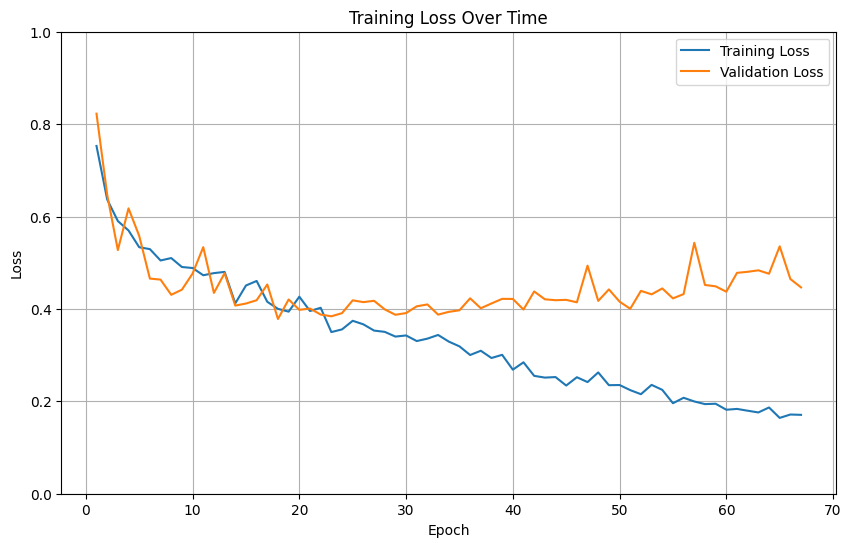

In [45]:
import matplotlib.pyplot as plt

train_loss = history["train_loss"]
val_loss = history["val_loss"]
epoch = range(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch, train_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


# Test

using validation data

## Initialization

In [47]:
from src.utils import load_model

# model = load_model("artifacts/resnet50/epoch_15.pth", num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
# model = load_model("artifacts/densenet121/epoch_10.pth", num_classes=2, dropout_rate=0.25)

model.load_state_dict(torch.load("artifacts/uc_infeksi_chron_tb/densenet121/epoch_38.pth", map_location=DEVICE))
model = model.to(DEVICE)

In [48]:
num_classes = len(categories)
# metrics
from torcheval.metrics import (
    MulticlassAccuracy,
    MulticlassF1Score,
    MulticlassPrecision,
    MulticlassAUROC,
    MulticlassAUPRC,
    MulticlassRecall    
)

# Metrics
from src.metrics import (
    MulticlassMCC,
    MulticlassSpecificity
)

test_metrics = {
    "mcc": MulticlassMCC(num_classes=num_classes, device=DEVICE),
    "auprc": MulticlassAUPRC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "auroc": MulticlassAUROC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "accuracy": MulticlassAccuracy(num_classes=num_classes, device=DEVICE),
    "f1_score": MulticlassF1Score(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "precision": MulticlassPrecision(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "recall": MulticlassRecall(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "specificity": MulticlassSpecificity(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE)
}

## Confussion Matrix

In [49]:
non_variant_train_loader = DataLoader(train_dataset, 
                          batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                          shuffle=False, 
                          num_workers=TRAINING_PARAMS['NUM_WORKERS'])

In [50]:
from src.test import test

raw_predictions, predicted_indices_flattened, target_indices_flattened, test_metrics = test(model = model, test_loader = test_loader, device = DEVICE, metrics=test_metrics)

Testing: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]


In [51]:
test_metrics

{'mcc': 0.5798956155776978,
 'auprc': 0.8709031343460083,
 'auroc': 0.9009935855865479,
 'accuracy': 0.8260869383811951,
 'f1_score': 0.7882039546966553,
 'precision': 0.7783516645431519,
 'recall': 0.8020269870758057,
 'specificity': 0.8020269870758057}

In [52]:
# Convert test_metrics to DataFrame
test_metrics_df = pd.DataFrame(test_metrics, index=['value'])

In [53]:
test_metrics_df.T

,value
mcc,0.626235
auprc,0.880767
auroc,0.906200
accuracy,0.853755
f1_score,0.813098
precision,0.814596
recall,0.811645
specificity,0.811645


In [54]:
categories

['uc_infeksi', 'chron_tb']

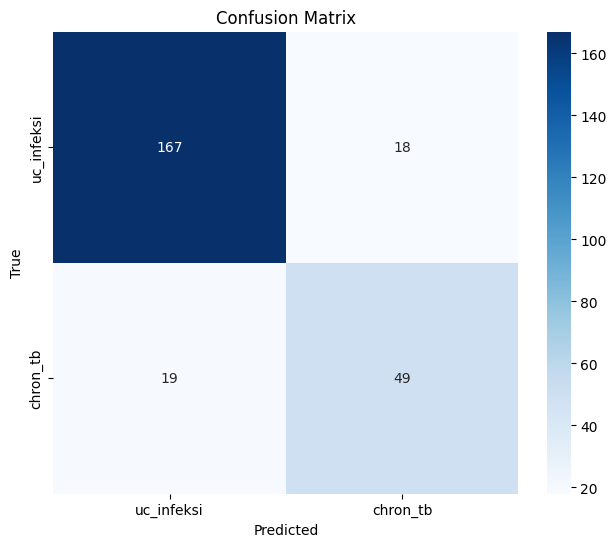

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Calculate confusion matrix
cm = confusion_matrix(target_indices_flattened, predicted_indices_flattened)

# Create figure and axis
plt.figure(figsize=(7.5, 8/10*7.5))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


In [56]:
# Concat raw_predictions (which is a list of tensor arrays) into a single tensor
raw_predictions_cat = torch.cat(raw_predictions, dim=0)
raw_predictions_np = raw_predictions_cat.cpu().numpy()

from torch.nn.functional import softmax
# Convert raw predictions to probabilities
raw_predictions_prob = softmax(torch.tensor(raw_predictions_np), dim=1).numpy()

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, matthews_corrcoef
from imblearn.metrics import specificity_score

matthews_corrcoef_value = matthews_corrcoef(target_indices_flattened, predicted_indices_flattened)
accuracy = accuracy_score(target_indices_flattened, predicted_indices_flattened)
f1 = f1_score(target_indices_flattened, predicted_indices_flattened, average=None)
precision = precision_score(target_indices_flattened, predicted_indices_flattened, average=None)
recall = recall_score(target_indices_flattened, predicted_indices_flattened, average=None)
specificity = specificity_score(target_indices_flattened, predicted_indices_flattened, average=None)
# roc_auc = roc_auc_score(target_indices_flattened, raw_predictions_prob, multi_class='ovr', average=None)
# average_precision = average_precision_score(target_indices_flattened, raw_predictions_prob, average=None)
roc_auc = roc_auc_score(target_indices_flattened, raw_predictions_prob[:, 1], multi_class='ovr', average=None)
average_precision = average_precision_score(target_indices_flattened, raw_predictions_prob[:, 1], average=None)

# Convert metrics to DataFrame for better visualization
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
#     categories[0]: [accuracy, f1[0], precision[0], recall[0], specificity[0], roc_auc[0], average_precision[0], matthews_corrcoef_value],
#     categories[1]: [accuracy, f1[1], precision[1], recall[1], specificity[1], roc_auc[1], average_precision[1], matthews_corrcoef_value],
#     categories[2]: [accuracy, f1[2], precision[2], recall[2], specificity[2], roc_auc[2], average_precision[2], matthews_corrcoef_value],
#     categories[3]: [accuracy, f1[3], precision[3], recall[3], specificity[3], roc_auc[3], average_precision[3], matthews_corrcoef_value]
# })

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
    categories[0]: [accuracy, f1[0], precision[0], recall[0], specificity[0], roc_auc, average_precision, matthews_corrcoef_value],
    categories[1]: [accuracy, f1[1], precision[1], recall[1], specificity[1], roc_auc, average_precision, matthews_corrcoef_value]
})

metrics_df.set_index('Metric', inplace=True)
metrics_df

,uc_infeksi,chron_tb
Metric,,
Accuracy,0.853755,0.853755
F1-Score,0.900270,0.725926
Precision,0.897849,0.731343
Recall,0.902703,0.720588
Specificity,0.720588,0.902703
ROC AUC (OVR),0.911208,0.911208
ROC PRC,0.808080,0.808080
MCC,0.626235,0.626235


In [ ]:
output_test_filenames_df = test_filenames_df.copy()
output_test_filenames_df['predicted'] = predicted_indices_flattened
output_test_filenames_df['predicted'] = output_test_filenames_df['predicted'].apply(lambda x: categories[x])
output_test_filenames_df

indo_test_filenames_df = output_test_filenames_df[(output_test_filenames_df['source'] == 'indo_cropped') | (output_test_filenames_df['class'] == 'infeksi') | (output_test_filenames_df['source'] == 'indo_cropped_test')]

target_indices_flattened_indo = target_indices_flattened[indo_test_filenames_df.index]
predicted_indices_flattened_indo = predicted_indices_flattened[indo_test_filenames_df.index]
raw_predictions_prob_indo = raw_predictions_prob[indo_test_filenames_df.index]

In [ ]:
matthews_corrcoef_value_indo = matthews_corrcoef(target_indices_flattened_indo, predicted_indices_flattened_indo)
accuracy_indo = accuracy_score(target_indices_flattened_indo, predicted_indices_flattened_indo)
f1_indo = f1_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
precision_indo = precision_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
recall_indo = recall_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
roc_auc_indo = roc_auc_score(target_indices_flattened_indo, raw_predictions_prob_indo, multi_class='ovr', average=None)
average_precision_indo = average_precision_score(target_indices_flattened_indo, raw_predictions_prob_indo, average=None)
specificity_indo = specificity_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)

# Convert metrics to DataFrame for better visualization
metrics_indo_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
    'UC': [accuracy_indo, f1_indo[0], precision_indo[0], recall_indo[0], specificity_indo[0], roc_auc_indo[0], average_precision_indo[0], matthews_corrcoef_value_indo],
    'Infeksi': [accuracy_indo, f1_indo[1], precision_indo[1], recall_indo[1], specificity_indo[1], roc_auc_indo[1], average_precision_indo[1], matthews_corrcoef_value_indo],
    'CD': [accuracy_indo, f1_indo[2], precision_indo[2], recall_indo[2], specificity_indo[2], roc_auc_indo[2], average_precision_indo[2], matthews_corrcoef_value_indo],
    'TB': [accuracy_indo, f1_indo[3], precision_indo[3], recall_indo[3], specificity_indo[3], roc_auc_indo[3], average_precision_indo[3], matthews_corrcoef_value_indo]
})
metrics_indo_df.set_index('Metric', inplace=True)
metrics_indo_df

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(target_indices_flattened_indo, predicted_indices_flattened_indo)

# Create figure and axis
plt.figure(figsize=(7.5, 8/10*7.5))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['UC', 'Infeksi', 'CD', 'TB'],
            yticklabels=['UC', 'Infeksi', 'CD', 'TB'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


## Test Metrics

In [ ]:
sample_image, sample_target = test_dataset[10]
sample_image = sample_image.unsqueeze(0).to(DEVICE)

with torch.no_grad():
    prediction = model(sample_image)
    predicted_class = torch.argmax(prediction, dim=1).item()

sample_image_np = sample_image.squeeze().cpu().numpy()
sample_image_np = np.transpose(sample_image_np, (1, 2, 0))
sample_image_np = sample_image_np*255
plt.figure(figsize=(8, 6))
plt.imshow(sample_image_np)
plt.title(f'Predicted Class: {"UC" if predicted_class == 0 else "Infeksi"}\n True Class: {"UC" if torch.argmax(sample_target).item() == 0 else "Infeksi"}\nConfidence: {torch.max(prediction).item():.2f}')
plt.axis('off')
plt.show()

print(f"True class: {'UC' if torch.argmax(sample_target).item() == 0 else 'Infeksi'}")
print(f"Predicted class: {'UC' if predicted_class == 0 else 'Infeksi'}")

# XDL

## GradCAM

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

from src.xdl import plot_XDL_GradCAM


plot_XDL_GradCAM(model = model, 
                 test_loader = test_loader, 
                 device = DEVICE, 
                 print_img = True, 
                 num_samples = 100, 
                 save_path = False)

## Smoothgrad

In [ ]:
uc_train_len = len(train_filenames_df[train_filenames_df['class'] == 'uc'])
uc_val_len = len(val_filenames_df[val_filenames_df['class'] == 'uc'])
uc_test_len = len(test_filenames_df[test_filenames_df['class'] == 'uc'])

print(f"""UC (LIMUC+Changsu) train: {uc_train_len}
      \nUC (LIMUC+Changsu) val: {uc_val_len}
      \nUC (LIMUC+Changsu) test: {uc_test_len}
      \nTotal: {uc_train_len + uc_val_len + uc_test_len}""")

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=len(test_loader.dataset.dataframe), 
                    print_img=False, 
                    print_every=10, 
                    save_path="outputs/smoothgrad/limuc_cropped_novasir_2",
                    smoothgrad_percentile=97,
                    smoothgrad_colormap='viridis',
                    smoothgrad_overlay_alpha=0.4,
                    fontsize=14)

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=5, 
                    print_img=True, 
                    print_every=10, 
                    save_path=False,
                    smoothgrad_percentile=91,
                    smoothgrad_colormap='viridis',
                    smoothgrad_overlay_alpha=0.6,
                    fontsize=14)

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=5, 
                    print_img=True, 
                    print_every=10, 
                    save_path=False,
                    smoothgrad_percentile=98,
                    smoothgrad_colormap='hot',
                    smoothgrad_overlay_alpha=0.3)

## GradCAM + Smoothgrad

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

In [ ]:
output_test_filenames_df = output_test_filenames_df[output_test_filenames_df['source'].isin(['indo_cropped', 'indo_cropped_test'])].copy()
output_test_filenames_df['predicted_class'] = output_test_filenames_df['predicted']
# Sample 100 images from the test set for each class
# output_test_filenames_df = output_test_filenames_df.groupby('class').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Randomly shuffle the sampled images
output_test_filenames_df = output_test_filenames_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Make Dataset
output_test_dataset = Dataset(dataframe=output_test_filenames_df, 
                              categories=DATASET_PARAMS['CATEGORIES'],
                              transform=val_transform, 
                              seed=42, 
                              shuffle=True)

# Make DataLoader
output_test_loader = DataLoader(output_test_dataset, 
                                 batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                                 num_workers=TRAINING_PARAMS['NUM_WORKERS'])

In [ ]:
from src.xdl import plot_XDL_Visualizations

plot_XDL_Visualizations(model, 
                        output_test_loader, 
                        device=DEVICE, 
                        num_samples=len(output_test_loader.dataset.dataframe), 
                        print_img=True, 
                        print_every=5, 
                        save_path="outputs/xdl/four_class_17_08_2025_all",)